#### 1. Import libraries 

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import math

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
from tabulate import tabulate

# Import libraries for statistical analysis
from scipy import stats

# Import libraries for machine learning
from sklearn.linear_model import LinearRegression

# Set visualization styles 
sns.set(style="whitegrid") 
plt.style.use('ggplot') # or use 'seaborn-dark'

In [2]:
# Load the data with the correct delimiter
data = pd.read_csv('../src/data/cleaned_data.csv', delimiter=',')

data.head()

C:\Users\Abeni\AppData\Local\Temp\ipykernel_13272\1446741532.py:2: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../src/data/cleaned_data.csv', delimiter=',')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
data.shape

(989266, 46)

#### 2. Univariate Analysis

Distribution of numerical columns

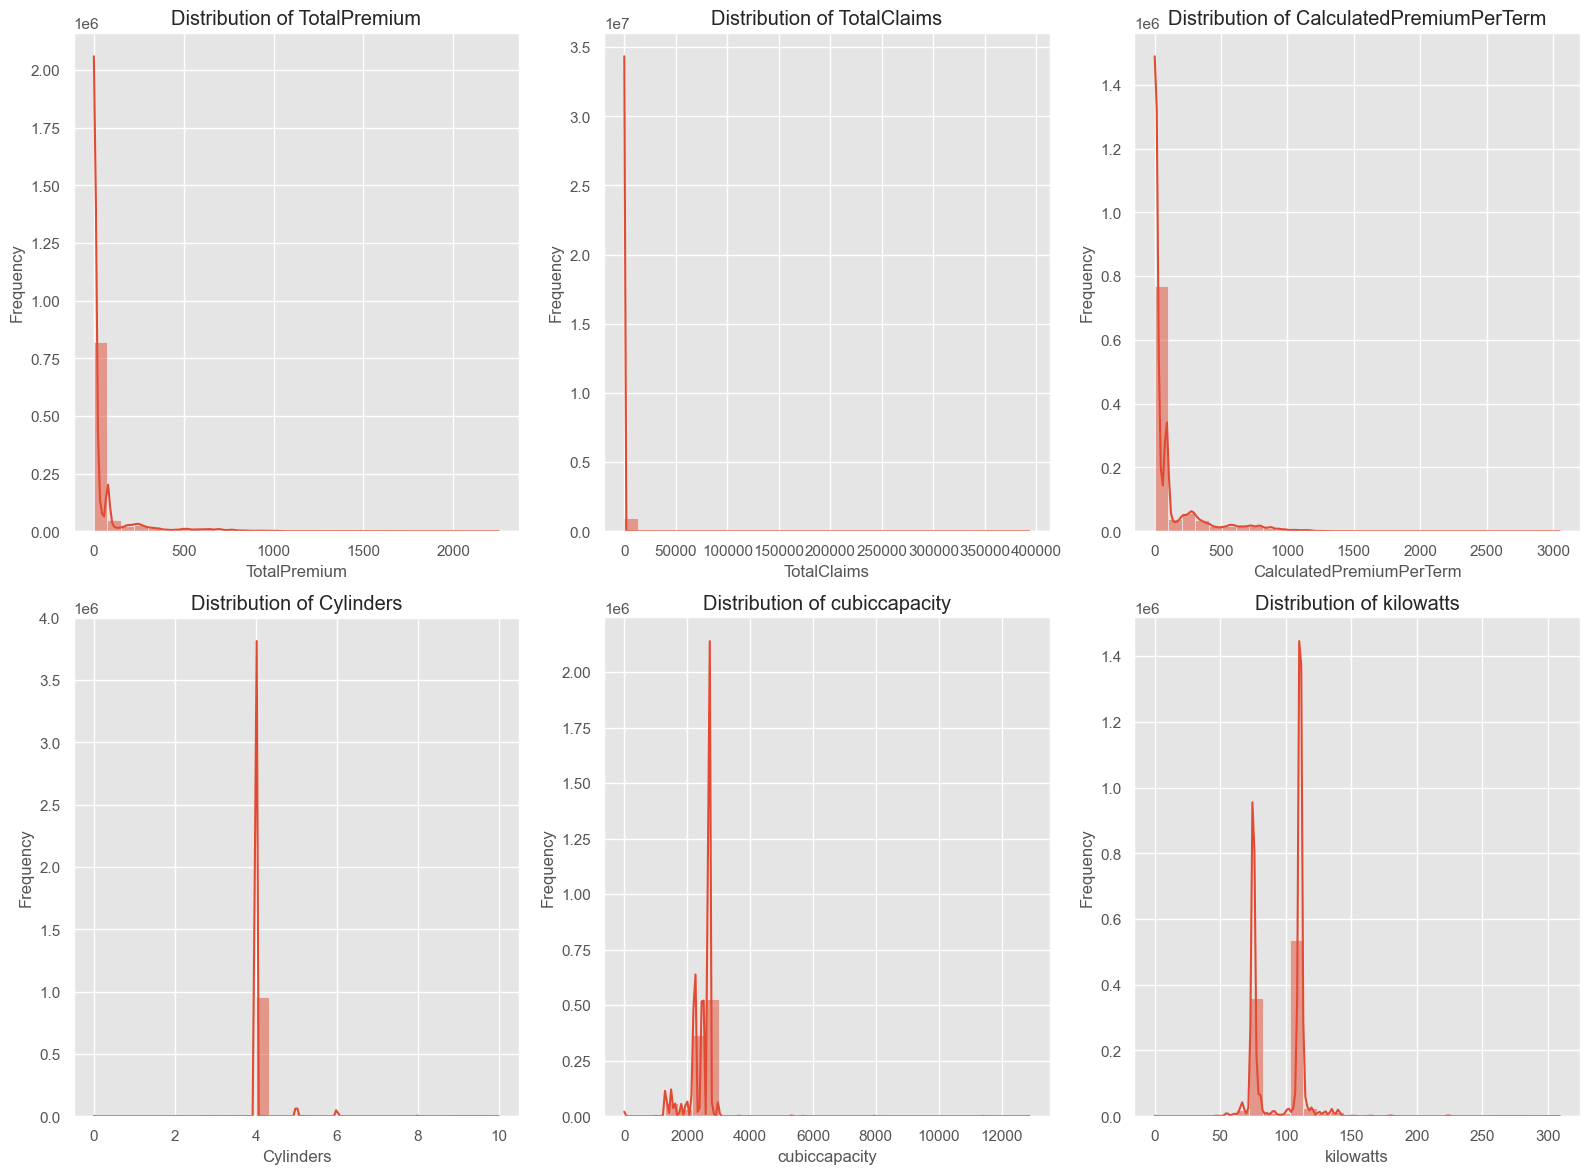

In [14]:
# Feasible numerical columns
feasible_numerical_columns = [
    'TotalPremium', 'TotalClaims','CalculatedPremiumPerTerm', 'Cylinders', 'cubiccapacity', 'kilowatts'
]

# Determine the number of rows and columns for the grid layout
num_columns = 3  # Number of subplots per row
num_rows = (len(feasible_numerical_columns) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create the subplots
plt.figure(figsize=(16, 12))  # Adjust overall figure size
for i, column in enumerate(feasible_numerical_columns):
    plt.subplot(num_rows, num_columns, i + 1)  # Create subplots in a grid
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

# Ensure proper spacing between subplots
plt.tight_layout()
plt.show()

Distribution of categorical columns

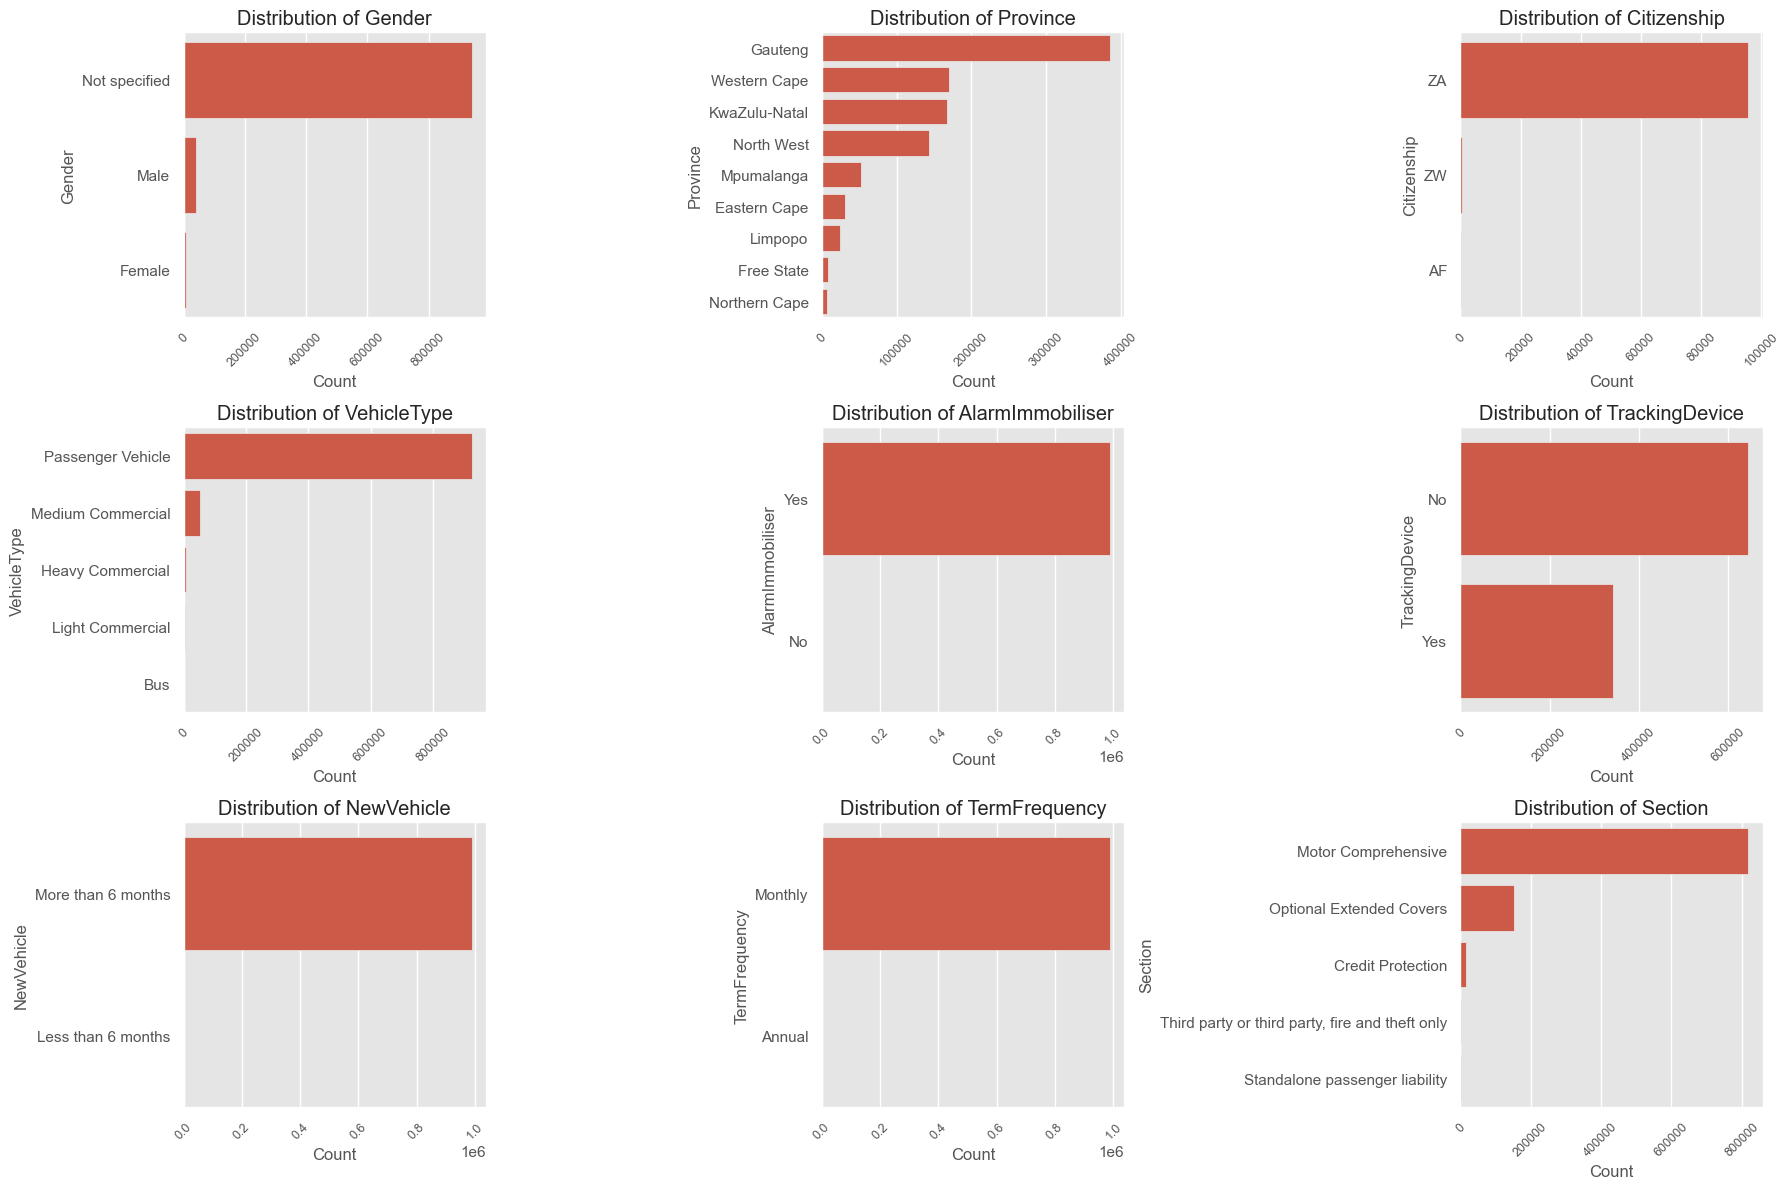

In [28]:
# Updated feasible categorical columns
feasible_categorical_columns = [
    'Gender', 'Province', 'Citizenship', 
    'VehicleType', 'AlarmImmobiliser', 'TrackingDevice', 
    'NewVehicle', 'TermFrequency', 'Section'
]

# Determine the number of rows and columns for the grid layout
num_columns = 3  # Number of subplots per row
num_rows = (len(feasible_categorical_columns) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create the subplots
plt.figure(figsize=(18, 12))  # Adjust overall figure size
for i, column in enumerate(feasible_categorical_columns):
    plt.subplot(num_rows, num_columns, i + 1)  # Create subplots in a grid
    sns.countplot(data[column], order=data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.xticks(rotation=45, fontsize=9)  # Adjust x-axis labels for readability

# Ensure proper spacing between subplots
plt.tight_layout()
plt.show()

Distribution of 'CoverType' and 'make'

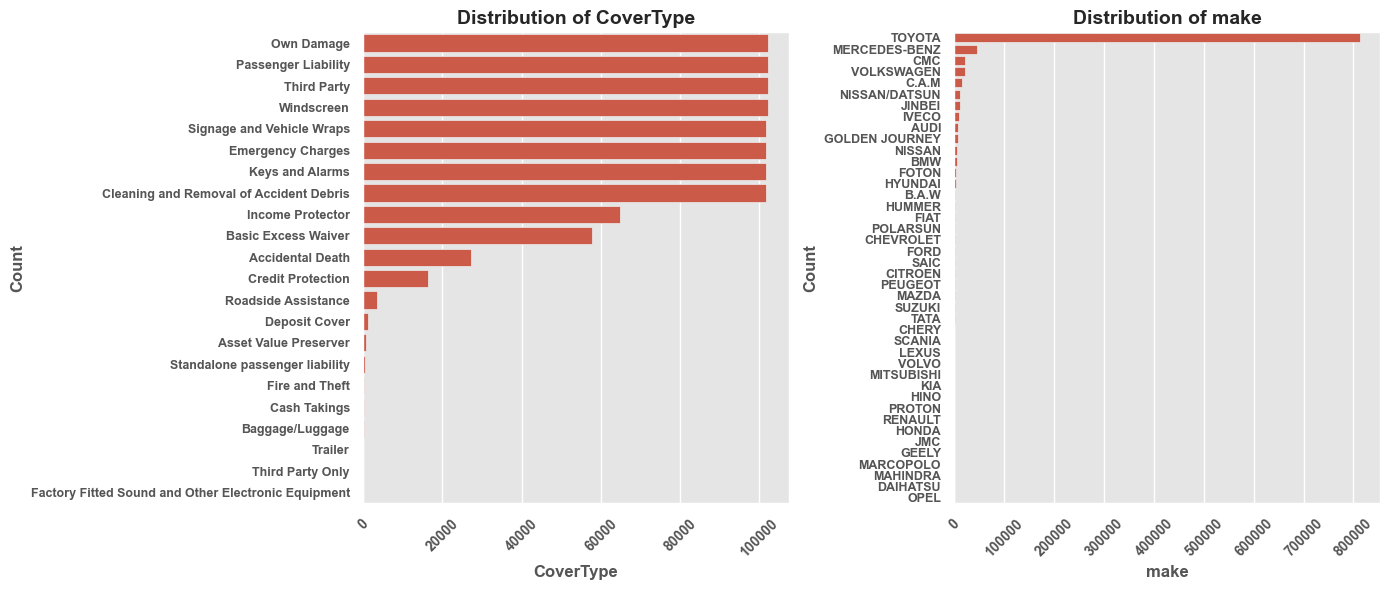

In [12]:
# Categorical columns to plot
categorical_columns = ['CoverType', 'make']

# Create subplots for side-by-side bar charts
plt.figure(figsize=(14, 6))  # Adjust the figure size
for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)  # Side-by-side layout
    sns.countplot(data[column], order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')  # Bold chart titles
    
    # Make x-axis and y-axis labels bold
    plt.xlabel(column, fontsize=12, fontweight='bold')  # Bold x-axis labels
    plt.ylabel("Count", fontsize=12, fontweight='bold')  # Bold y-axis labels
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10, fontweight='bold')  # Bold x-axis ticks
    plt.yticks(fontsize=9, fontweight='bold')  # Bold y-axis ticks

# Ensure proper layout
plt.tight_layout()
plt.show()

#### 3. Bivariate or Multivariate Analysis

Monthly changes for TotalPremium and TotalClaims, and TotalPremium vs TotalClaims by PostalCode

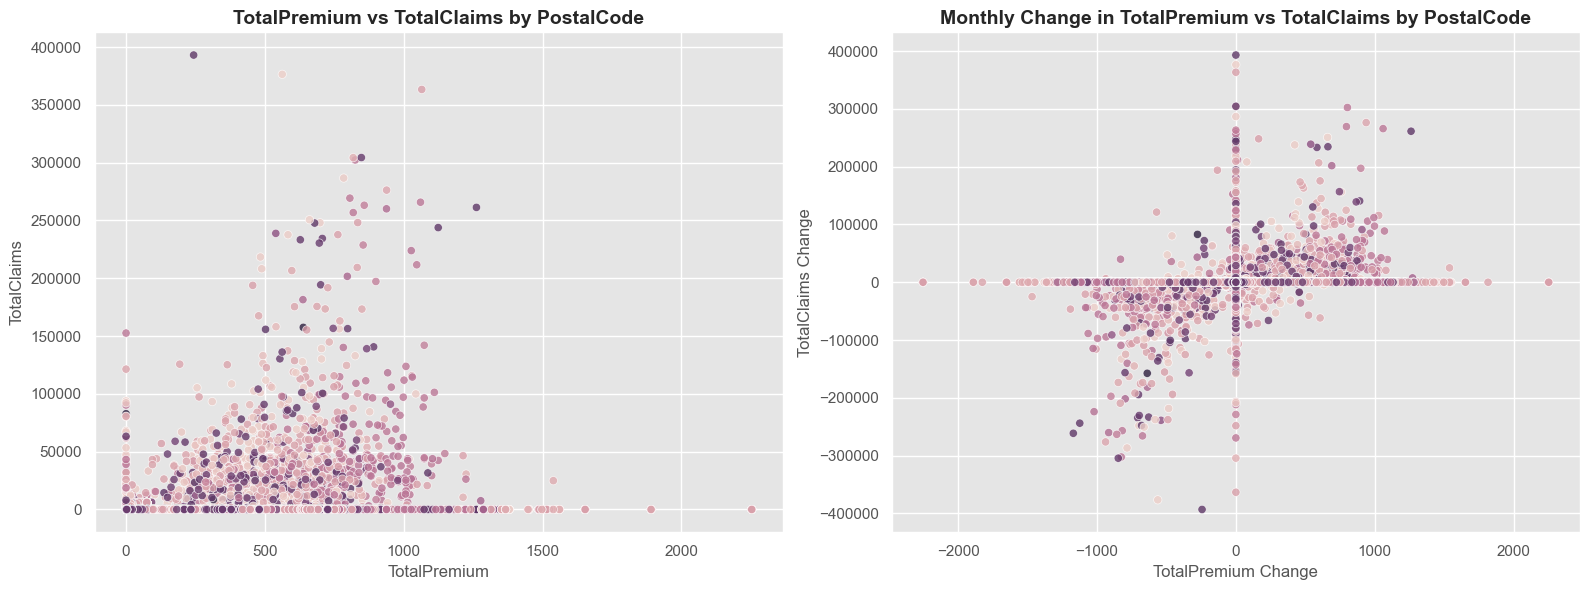

In [8]:
# Calculate monthly changes for TotalPremium and TotalClaims
data['TotalPremiumChange'] = data.groupby('PostalCode')['TotalPremium'].diff()
data['TotalClaimsChange'] = data.groupby('PostalCode')['TotalClaims'].diff()

# Create subplots for side-by-side plots
plt.figure(figsize=(16, 6))  # Adjust overall figure size

# Plot 1: TotalPremium vs TotalClaims by PostalCode
plt.subplot(1, 2, 1)
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data, alpha=0.8)
plt.title('TotalPremium vs TotalClaims by PostalCode', fontsize=14, fontweight='bold')
plt.xlabel('TotalPremium', fontsize=12)
plt.ylabel('TotalClaims', fontsize=12)
plt.legend([], [], frameon=False)  # Hides the legend for cleaner visualization

# Plot 2: Monthly Change in TotalPremium vs TotalClaims by PostalCode
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalPremiumChange', y='TotalClaimsChange', hue='PostalCode', data=data, alpha=0.8)
plt.title('Monthly Change in TotalPremium vs TotalClaims by PostalCode', fontsize=14, fontweight='bold')
plt.xlabel('TotalPremium Change', fontsize=12)
plt.ylabel('TotalClaims Change', fontsize=12)
plt.legend([], [], frameon=False)  # Hides the legend for cleaner visualization

# Adjust spacing between plots
plt.tight_layout()
plt.show()

Correlation matrix for numerical columns

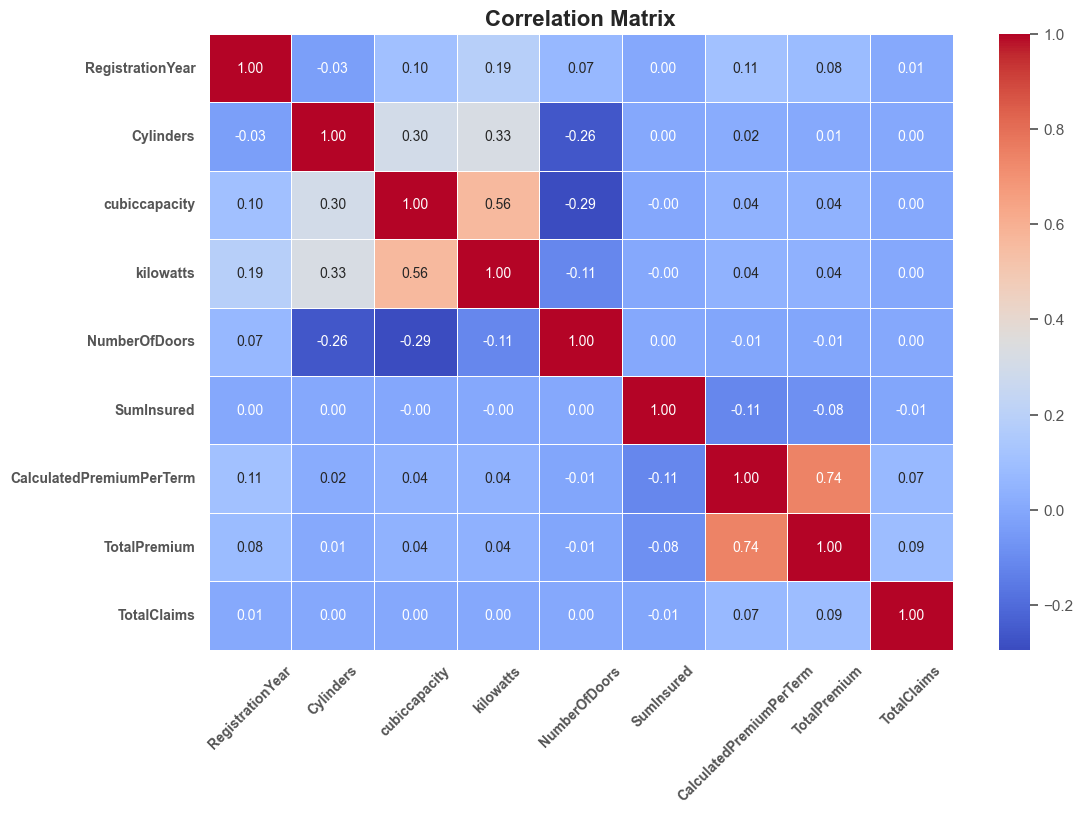

In [5]:
# Updated columns for correlation matrix
selected_columns = [
    'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
    'NumberOfDoors', 'SumInsured', 'CalculatedPremiumPerTerm',
    'TotalPremium', 'TotalClaims'
]

# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')  # Added styling to the title
plt.xticks(fontsize=10, rotation=45, fontweight='bold')  # Rotated and adjusted font size for x-axis labels
plt.yticks(fontsize=10, fontweight='bold')  # Adjusted font size for y-axis labels
plt.show()

#### 4. Comparisons different fields by MainCrestaZone

Calculate Monthly Changes for TotalPremium and TotalClaims

In [9]:
# Calculate monthly changes for TotalPremium and TotalClaims
data['TotalPremiumChange'] = data.groupby('MainCrestaZone')['TotalPremium'].diff()
data['TotalClaimsChange'] = data.groupby('MainCrestaZone')['TotalClaims'].diff()

4.1 Plot Trends for CoverType by MainCrestaZone

C:\Users\Abeni\AppData\Local\Temp\ipykernel_13272\2520183495.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

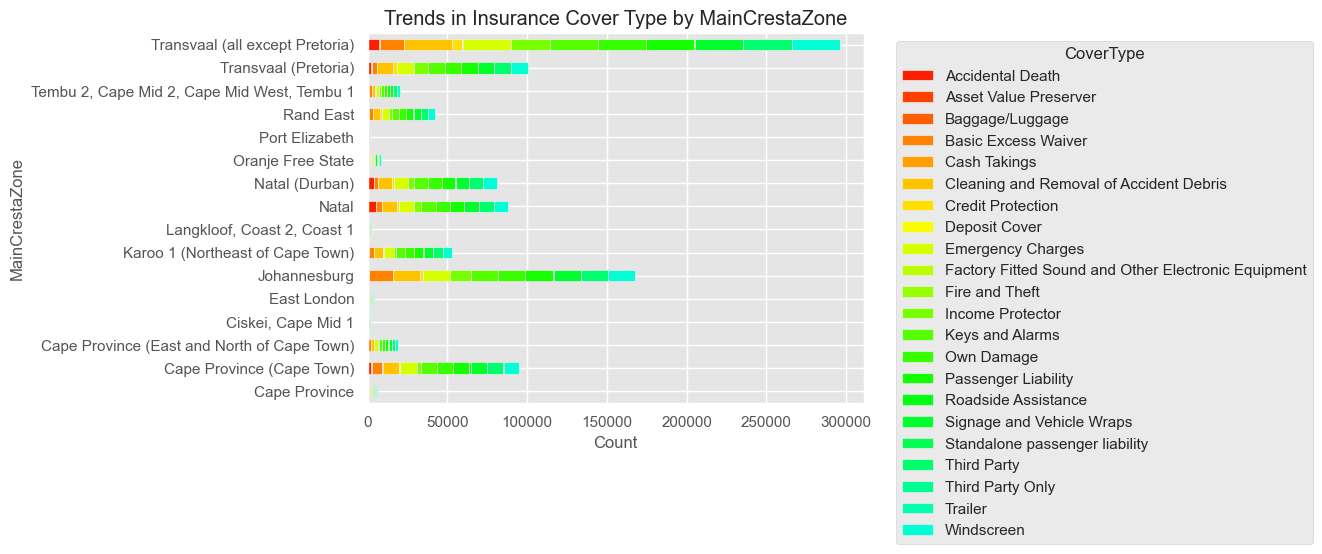

In [10]:
# Calculate the count of each CoverType per MainCrestaZone
cover_type_counts = data.groupby('MainCrestaZone')['CoverType'].value_counts().unstack().fillna(0)

# Sort the legend items alphabetically
cover_type_counts = cover_type_counts[sorted(cover_type_counts.columns)]

# Create a custom color palette
custom_palette = sns.color_palette("hsv", 45)

# Plot horizontal bar chart for CoverType
plt.figure(figsize=(12, 8))
cover_type_counts.plot(kind='barh', stacked=True, color=custom_palette)
plt.title('Trends in Insurance Cover Type by MainCrestaZone')
plt.ylabel('MainCrestaZone', fontweight='normal')
plt.xlabel('Count')
plt.legend(title='CoverType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

4.2 Plot Trends for Make by MainCrestaZone

C:\Users\Abeni\AppData\Local\Temp\ipykernel_13272\936435778.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 2000x1400 with 0 Axes>

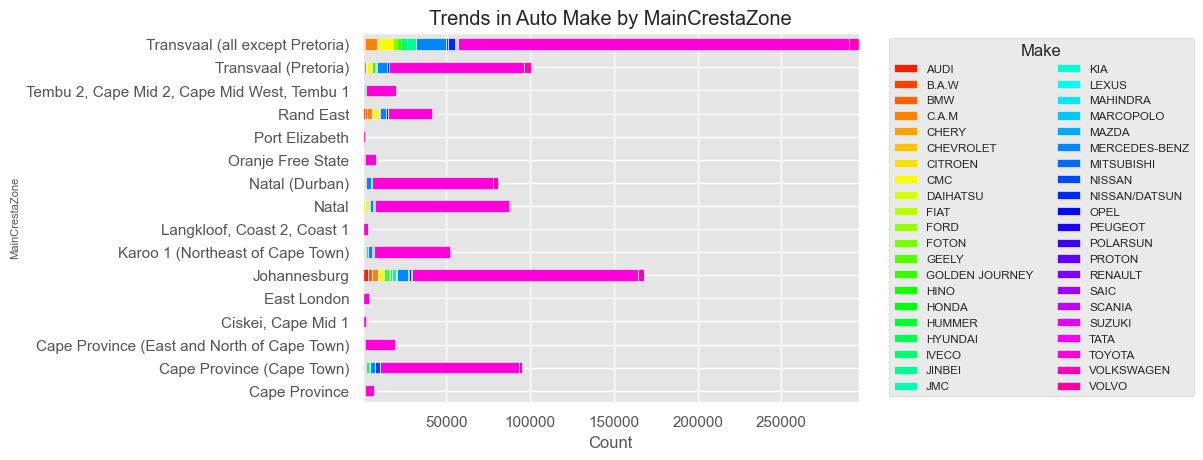

In [11]:
# Calculate the count of each make per MainCrestaZone
make_counts = data.groupby('MainCrestaZone')['make'].value_counts().unstack().fillna(0)

# Sort the legend items alphabetically
make_counts = make_counts[sorted(make_counts.columns)]

# Plot horizontal bar chart for Make
plt.figure(figsize=(20, 14))  # Increased figure size
make_counts.plot(kind='barh', stacked=True, color=custom_palette)
plt.title('Trends in Auto Make by MainCrestaZone')
plt.ylabel('MainCrestaZone', fontweight='normal', fontsize=8)
plt.xlabel('Count', fontsize=12)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')  # Adjust legend position
plt.tight_layout()
plt.show()

4.3 Plot Trends for TotalPremiumChange by MainCrestaZone

C:\Users\Abeni\AppData\Local\Temp\ipykernel_13272\2653095174.py:3: UserWarning: The palette list has more values (45) than needed (16), which may not be intended.
  sns.lineplot(data=data, x='TransactionMonth', y='TotalPremiumChange', hue='MainCrestaZone', palette=custom_palette)


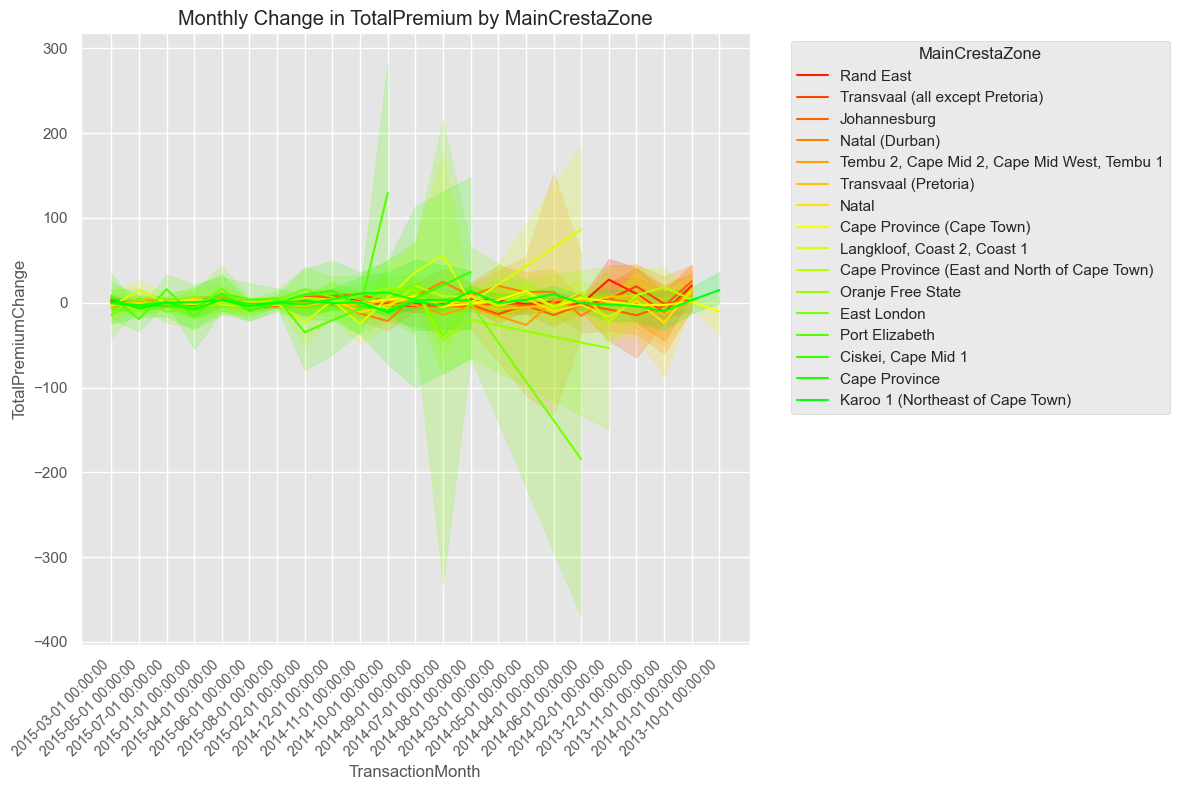

In [12]:
# Line plot for TotalPremiumChange by MainCrestaZone
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='TransactionMonth', y='TotalPremiumChange', hue='MainCrestaZone', palette=custom_palette)
plt.title('Monthly Change in TotalPremium by MainCrestaZone')
plt.xlabel('TransactionMonth')
plt.ylabel('TotalPremiumChange')
plt.legend(title='MainCrestaZone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

4.4 Plot Trends for TotalClaimsChange by MainCrestaZone

C:\Users\Abeni\AppData\Local\Temp\ipykernel_13272\3446066962.py:3: UserWarning: The palette list has more values (45) than needed (16), which may not be intended.
  sns.lineplot(data=data, x='TransactionMonth', y='TotalClaimsChange', hue='MainCrestaZone', palette=custom_palette)


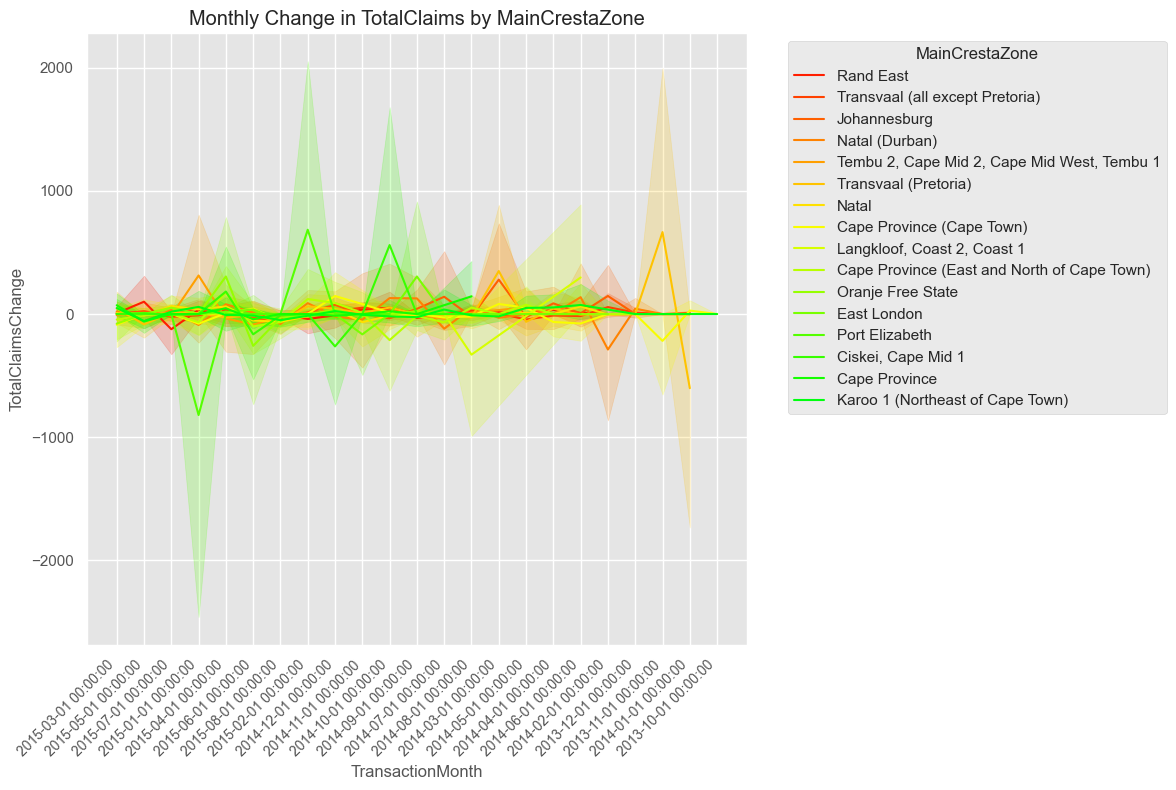

In [13]:
# Line plot for TotalClaimsChange by MainCrestaZone
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='TransactionMonth', y='TotalClaimsChange', hue='MainCrestaZone', palette=custom_palette)
plt.title('Monthly Change in TotalClaims by MainCrestaZone')
plt.xlabel('TransactionMonth')
plt.ylabel('TotalClaimsChange')
plt.legend(title='MainCrestaZone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

#### 5. Analyze trends for TotalPremium and TotalClaims with different fields

In [66]:
# Calculate the difference between TotalPremium and TotalClaims for each record
data['Difference'] = data['TotalPremium'] - data['TotalClaims']

# Define a function to calculate losses and profits for a given column and show top N results
def calculate_losses(column_name, top_n=None, print_results=False):
    # Group by the specified column and calculate the sum of TotalPremium, TotalClaims, and Difference
    premium_claims = data.groupby(column_name)[['TotalPremium', 'TotalClaims']].sum().reset_index()
    premium_claims['Difference'] = premium_claims['TotalPremium'] - premium_claims['TotalClaims']
    
    # Calculate the profit/loss percentage for each group
    premium_claims['Profit/Loss %'] = (premium_claims['Difference'] / premium_claims['TotalPremium']) * 100
    
    # Calculate the frequency and frequency percentage
    frequency_counts = data[column_name].value_counts().reset_index()
    frequency_counts.columns = [column_name, 'Frequency']
    frequency_counts['Frequency Percentage %'] = (frequency_counts['Frequency'] / frequency_counts['Frequency'].sum()) * 100
    
    # Merge the frequency counts with the premium claims
    premium_claims = pd.merge(premium_claims, frequency_counts, on=column_name)
    
    # Calculate the average profit/loss per frequency
    premium_claims['Avg Profit/Loss per Frequency $'] = premium_claims['Difference'] / premium_claims['Frequency']
    
    # Sort by Avg Profit/Loss per Frequency $
    premium_claims = premium_claims.sort_values(by='Avg Profit/Loss per Frequency $', ascending=True)
    
    # Select top N results if specified
    if top_n:
        premium_claims = premium_claims.head(top_n)
    
    # Calculate the total aggregate difference
    total_aggregate_difference = premium_claims['Difference'].sum()
    
    # Format the columns
    premium_claims.columns = [column_name, 'TotalPremium $', 'TotalClaims $', 'Difference $', 'Profit/Loss %', 'Frequency', 'Frequency Percentage %', 'Avg Profit/Loss per Frequency $']
    premium_claims['TotalPremium $'] = premium_claims['TotalPremium $'].apply(lambda x: f"{x:,.2f}")
    premium_claims['TotalClaims $'] = premium_claims['TotalClaims $'].apply(lambda x: f"{x:,.2f}")
    premium_claims['Difference $'] = premium_claims['Difference $'].apply(lambda x: f"{x:,.2f}")
    premium_claims['Profit/Loss %'] = premium_claims['Profit/Loss %'].apply(lambda x: f"{x:.2f}%")
    premium_claims['Frequency'] = premium_claims['Frequency'].apply(lambda x: f"{x:,}")
    premium_claims['Frequency Percentage %'] = premium_claims['Frequency Percentage %'].apply(lambda x: f"{x:.2f}%")
    premium_claims['Avg Profit/Loss per Frequency $'] = premium_claims['Avg Profit/Loss per Frequency $'].apply(lambda x: f"{x:,.2f}")
    
    # Print the results if specified
    if print_results:
        print(f"Losses and Profits by {column_name}:")
        print(tabulate(premium_claims, headers='keys', tablefmt='pretty', showindex=False))
        print(f"Total Aggregate Difference for {column_name}: ${total_aggregate_difference:,.2f}\n")
    
    return premium_claims

# List of columns to analyze
columns_to_analyze = [
    'LegalType', 'TransactionMonth', 'CoverType', 'CoverCategory', 'CoverGroup', 'Section', 'Product', 'Province', 
    'MainCrestaZone', 'SubCrestaZone', 'IsVATRegistered', 'Citizenship', 'Title', 'MaritalStatus', 'Gender', 
    'Bank', 'AccountType', 'VehicleType', 'RegistrationYear', 'make', 'bodytype', 'AlarmImmobiliser', 
    'NewVehicle', 'TermFrequency', 'ExcessSelected'
]

# Example of running the analysis for a specific column without printing
# You can call this function for each column as needed
# result = calculate_losses('CoverType', top_n=10, print_results=False)

#### A. Demographic Analysis

Citizenship

In [173]:
calculate_losses('Citizenship')

,Citizenship,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,,"55,246,472.85","58,667,347.34","-3,420,874.50",-6.19%,"892,879",90.26%,-3.83
2,ZA,"5,211,491.86","5,153,949.53","57,542.33",1.10%,"95,668",9.67%,0.60
1,AF,"14,366.06",0.00,"14,366.06",100.00%,231,0.02%,62.19
3,ZW,"54,596.40",0.00,"54,596.40",100.00%,488,0.05%,111.88


Title

In [174]:
calculate_losses('Title')

,Title,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,Dr,"42,551.48","79,352.98","-36,801.51",-86.49%,810,0.08%,-45.43
2,Mr,"56,457,901.20","60,738,784.50","-4,280,883.30",-7.58%,"922,725",93.27%,-4.64
4,Ms,"672,725.15","683,749.04","-11,023.88",-1.64%,"13,269",1.34%,-0.83
3,Mrs,"2,871,122.32","2,052,999.20","818,123.12",28.49%,"45,848",4.63%,17.84
1,Miss,"482,627.02","266,411.16","216,215.86",44.80%,"6,614",0.67%,32.69


MaritalStatus

In [175]:
calculate_losses('MaritalStatus')

,MaritalStatus,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,Married,"106,826.52","111,707.20","-4,880.68",-4.57%,"1,377",0.14%,-3.54
1,Not specified,"60,298,950.48","63,623,753.92","-3,324,803.43",-5.51%,"983,635",99.43%,-3.38
2,Single,"121,150.17","85,835.76","35,314.40",29.15%,"4,254",0.43%,8.30


In [176]:
# The table indicates that single individuals are more profitable for the company, with a profit of $35,314.40 and a profit/loss percentage of 29.15%, and an average profit/loss per frequency of $8.30. In contrast, married individuals and those with unspecified marital status result in losses of $4,880.68 (-4.57%) and $3,324,803.43 (-5.51%) respectively, with average profit/loss per frequency of -$3.54 and -$3.38. This suggests that the company might need to reassess its pricing or risk management strategies for married individuals and those with unspecified marital status to improve profitability.

Gender

In [177]:
calculate_losses('Gender')

,Gender,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
2,Not specified,"58,639,349.13","62,176,074.06","-3,536,724.92",-6.03%,"940,386",95.06%,-3.76
1,Male,"1,583,097.48","1,394,976.72","188,120.76",11.88%,"42,125",4.26%,4.47
0,Female,"304,480.55","250,246.10","54,234.45",17.81%,"6,755",0.68%,8.03


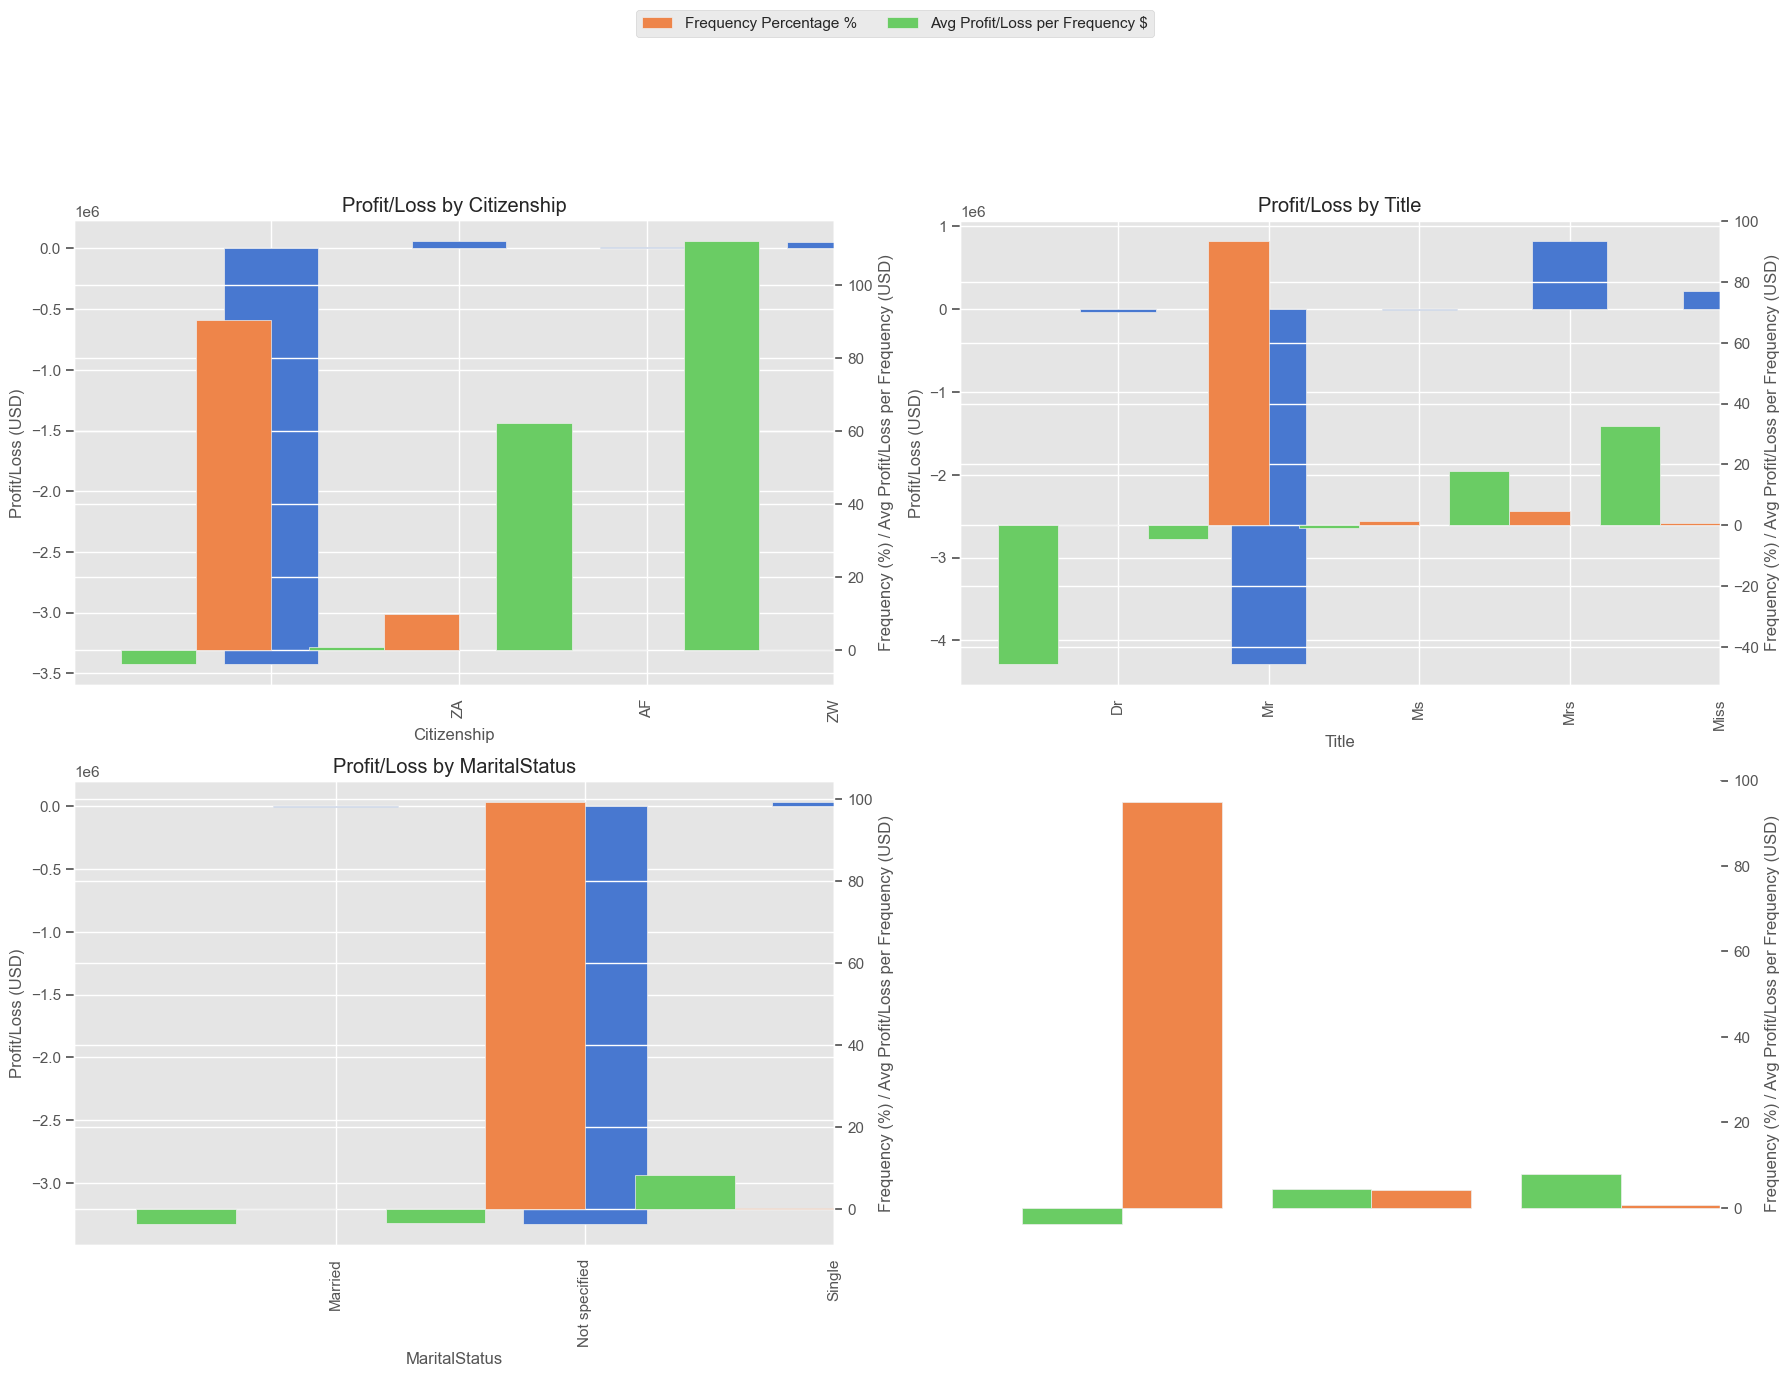

In [178]:
# Demographic Analysis
demographic_columns = ['Citizenship', 'Title', 'MaritalStatus', 'Gender']
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for i, column in enumerate(demographic_columns):
    result = calculate_losses(column)
    result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
    result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
    result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

    # Improved color palette using seaborn
    colors = sns.color_palette("muted")  # Choose a color palette

    ax = axs[i // 2, i % 2]
    result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
    ax2 = ax.twinx()
    result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
    result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

    # Improved axis labels
    ax.set_title(f'Profit/Loss by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Profit/Loss (USD)')
    ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

    # Rotate x-axis labels for readability (if necessary)
    if len(result[column].unique()) > 5:  # Check for long labels
        plt.xticks(rotation=45, ha='right')

    ax.grid(True)

# Remove the empty subplot and adjust the size of the third subplot
fig.delaxes(axs[1, 1])
axs[1, 0].set_position([0.125, 0.1, 0.775, 0.6])

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()


#### B. Geographical Analysis
Province

In [86]:
calculate_losses('Province')

,Province,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
2,Gauteng,"23,225,210.17","28,899,914.15","-5,674,703.99",-24.43%,"385,796",39.00%,-14.71
3,KwaZulu-Natal,"13,235,782.89","14,301,382.45","-1,065,599.56",-8.05%,"167,807",16.96%,-6.35
8,Western Cape,"9,223,771.89","9,837,051.29","-613,279.40",-6.65%,"170,093",17.19%,-3.61
6,North West,"7,490,508.18","5,920,250.00","1,570,258.18",20.96%,"143,287",14.48%,10.96
5,Mpumalanga,"2,836,105.57","2,045,382.84","790,722.73",27.88%,"52,636",5.32%,15.02
1,Free State,"521,363.24","354,922.27","166,440.97",31.92%,"8,099",0.82%,20.55
4,Limpopo,"1,537,324.50","1,016,476.71","520,847.79",33.88%,"24,836",2.51%,20.97
0,Eastern Cape,"2,140,302.66","1,356,426.66","783,876.00",36.62%,"30,332",3.07%,25.84
7,Northern Cape,"316,558.07","89,490.51","227,067.56",71.73%,"6,380",0.64%,35.59


MainCrestaZone

In [87]:
calculate_losses('MainCrestaZone')

,MainCrestaZone,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
9,Natal (Durban),"6,683,324.77","8,626,721.63","-1,943,396.85",-29.08%,"81,129",8.20%,-23.95
5,Johannesburg,"10,592,964.80","13,957,792.95","-3,364,828.14",-31.76%,"167,964",16.98%,-20.03
1,Cape Province (Cape Town),"5,004,089.87","6,531,229.07","-1,527,139.20",-30.52%,"95,234",9.63%,-16.04
14,Transvaal (Pretoria),"5,911,087.18","7,512,558.58","-1,601,471.40",-27.09%,"100,331",10.14%,-15.96
2,Cape Province (East and North of Cape Town),"1,229,288.37","1,274,758.51","-45,470.14",-3.70%,"19,391",1.96%,-2.34
11,Port Elizabeth,"87,174.77","91,064.88","-3,890.11",-4.46%,"1,782",0.18%,-2.18
12,Rand East,"2,182,162.15","2,039,060.35","143,101.80",6.56%,"42,160",4.26%,3.39
15,Transvaal (all except Pretoria),"16,402,934.27","14,372,611.82","2,030,322.45",12.38%,"296,100",29.93%,6.86
8,Natal,"6,638,996.40","5,856,141.62","782,854.77",11.79%,"88,022",8.90%,8.89
6,Karoo 1 (Northeast of Cape Town),"2,884,321.52","2,023,111.34","861,210.18",29.86%,"52,731",5.33%,16.33


SubCrestaZone

In [88]:
calculate_losses('SubCrestaZone')

,SubCrestaZone,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
24,Natal Cape,"94,821.76","260,087.72","-165,265.96",-174.29%,942,0.10%,-175.44
28,Pondo,"107,362.46","181,480.80","-74,118.34",-69.04%,"1,785",0.18%,-41.52
10,Durban,"6,683,324.77","8,626,721.63","-1,943,396.85",-29.08%,"81,129",8.20%,-23.95
32,Rand West,"1,291,953.04","1,781,204.02","-489,250.98",-37.87%,"22,474",2.27%,-21.77
15,Johannesburg,"10,592,964.80","13,957,792.95","-3,364,828.14",-31.76%,"167,964",16.98%,-20.03
5,Cape Town,"5,004,089.87","6,531,229.07","-1,527,139.20",-30.52%,"95,234",9.63%,-16.04
30,Pretoria,"5,911,087.18","7,512,558.58","-1,601,471.40",-27.09%,"100,331",10.14%,-15.96
23,Natal 3,"1,358,606.11","1,582,677.01","-224,070.90",-16.49%,"16,299",1.65%,-13.75
40,Transvaal South,"2,739,180.86","3,291,315.61","-552,134.75",-20.16%,"45,570",4.61%,-12.12
17,Karoo 1,"95,411.26","107,896.90","-12,485.64",-13.09%,"1,346",0.14%,-9.28


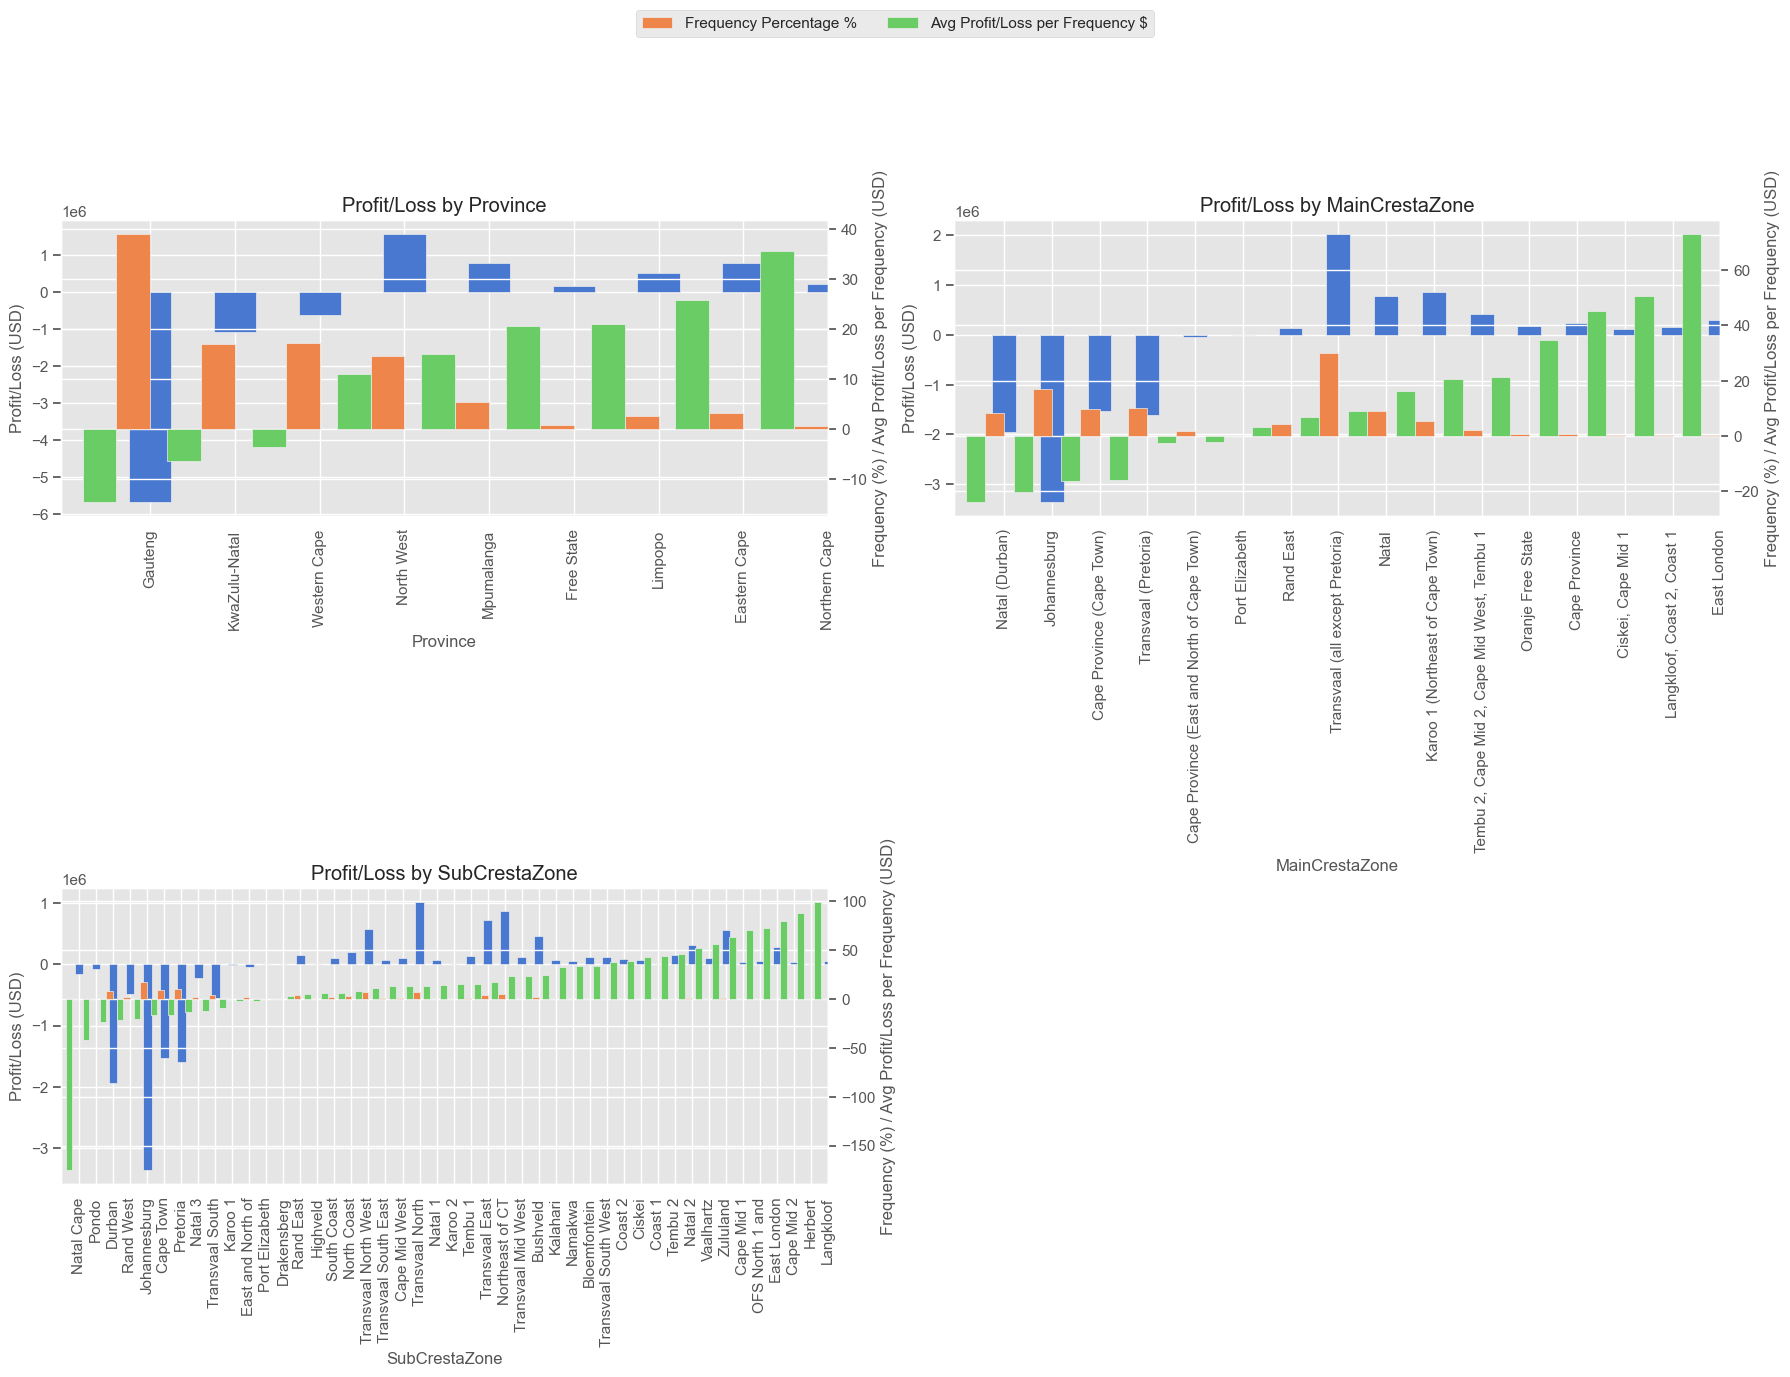

In [156]:
import seaborn as sns  # Import seaborn for color palettes

# Geographical Analysis
geographical_columns = ['Province', 'MainCrestaZone', 'SubCrestaZone']
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for i, column in enumerate(geographical_columns):
  result = calculate_losses(column)
  result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
  result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
  result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

  # Improved color palette using seaborn
  colors = sns.color_palette("muted")  # Choose a color palette

  ax = axs[i // 2, i % 2]
  result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
  ax2 = ax.twinx()
  result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
  result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

  # Improved axis labels
  ax.set_title(f'Profit/Loss by {column}')
  ax.set_xlabel(column)
  ax.set_ylabel('Profit/Loss (USD)')
  ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

  # Rotate x-axis labels for readability (if necessary)
  if len(result[column].unique()) > 5:  # Check for long labels
    plt.xticks(rotation=45, ha='right')

  ax.grid(True)

# Remove the empty subplot and adjust the size of the third subplot
fig.delaxes(axs[1, 1])
axs[1, 0].set_position([0.125, 0.1, 0.775, 0.6])

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()

#### C. Policy Analysis
LegalType

In [89]:
calculate_losses('LegalType')

,LegalType,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
3,Private company,"4,605,638.12","6,573,211.92","-1,967,573.80",-42.72%,"74,110",7.49%,-26.55
1,Individual,"55,595,046.20","57,118,691.01","-1,523,644.81",-2.74%,"910,878",92.08%,-1.67
0,Close Corporation,"155,141.41","124,593.94","30,547.48",19.69%,"2,459",0.25%,12.42
2,Partnership,"14,014.31",0.00,"14,014.31",100.00%,331,0.03%,42.34
4,Public company,"125,600.28","4,800.00","120,800.28",96.18%,"1,295",0.13%,93.28
5,Sole proprieter,"31,486.84",0.00,"31,486.84",100.00%,193,0.02%,163.14


TransactionMonth

In [90]:
calculate_losses('TransactionMonth')

,TransactionMonth,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
5,2014-03-01,"84,941.09","322,785.02","-237,843.93",-280.01%,"3,094",0.31%,-76.87
14,2014-12-01,"3,686,796.37","6,065,302.28","-2,378,505.91",-64.51%,"61,912",6.26%,-38.42
1,2013-11-01,"20,486.92","50,585.08","-30,098.16",-146.91%,"1,024",0.10%,-29.39
18,2015-04-01,"6,294,254.02","8,872,195.99","-2,577,941.98",-40.96%,"95,884",9.69%,-26.89
13,2014-11-01,"2,656,565.11","3,696,867.35","-1,040,302.24",-39.16%,"47,776",4.83%,-21.77
15,2015-01-01,"4,131,122.03","5,491,507.85","-1,360,385.81",-32.93%,"71,006",7.18%,-19.16
17,2015-03-01,"5,794,411.95","7,341,493.09","-1,547,081.14",-26.70%,"91,331",9.23%,-16.94
6,2014-04-01,"217,944.29","306,863.59","-88,919.30",-40.80%,"6,544",0.66%,-13.59
16,2015-02-01,"4,989,063.79","6,098,908.18","-1,109,844.38",-22.25%,"82,530",8.34%,-13.45
4,2014-02-01,"52,217.27","62,989.31","-10,772.03",-20.63%,"1,719",0.17%,-6.27


CoverType

In [91]:
calculate_losses('CoverType', top_n=10)

,CoverType,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
9,Factory Fitted Sound and Other Electronic Equi...,0.00,"21,094.74","-21,094.74",-inf%,3,0.00%,"-7,031.58"
13,Own Damage,"36,251,602.92","58,150,570.51","-21,898,967.59",-60.41%,"102,292",10.34%,-214.08
21,Windscreen,"1,274,454.66","1,280,177.06","-5,722.40",-0.45%,"102,120",10.32%,-0.06
16,Signage and Vehicle Wraps,"106,826.73",0.00,"106,826.73",100.00%,"101,734",10.28%,1.05
12,Keys and Alarms,"213,649.91","8,273.33","205,376.58",96.13%,"101,732",10.28%,2.02
14,Passenger Liability,"213,719.81",0.00,"213,719.81",100.00%,"102,283",10.34%,2.09
8,Emergency Charges,"320,528.09","16,666.67","303,861.43",94.80%,"101,733",10.28%,2.99
5,Cleaning and Removal of Accident Debris,"320,397.12",0.00,"320,397.12",100.00%,"101,713",10.28%,3.15
11,Income Protector,"2,973,185.63","2,565,458.77","407,726.85",13.71%,"64,779",6.55%,6.29
4,Cash Takings,"2,351.16",0.00,"2,351.16",100.00%,291,0.03%,8.08


CoverCategory

In [94]:
calculate_losses('CoverCategory')

,CoverCategory,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
10,Factory Fitted Sound and Other Electronic Equi...,0.00,"21,094.74","-21,094.74",-inf%,3,0.00%,"-7,031.58"
16,Own damage,"2,390,606.12","4,665,189.25","-2,274,583.14",-95.15%,"8,497",0.86%,-267.69
24,Vehicle over R100 000,"343,024.54","525,738.69","-182,714.15",-53.27%,770,0.08%,-237.29
14,Own Damage,"30,186,242.08","47,713,254.21","-17,527,012.13",-58.06%,"78,185",7.90%,-224.17
15,Own Damage.,"3,363,137.30","5,246,388.35","-1,883,251.04",-56.00%,"15,061",1.52%,-125.04
26,Windscreen,"1,170,737.48","1,232,342.91","-61,605.43",-5.26%,"95,711",9.67%,-0.64
19,Signage and Vehicle Wraps,"106,826.73",0.00,"106,826.73",100.00%,"101,734",10.28%,1.05
13,Keys and Alarms,"213,649.91","8,273.33","205,376.58",96.13%,"101,732",10.28%,2.02
17,Passenger Liability,"213,719.81",0.00,"213,719.81",100.00%,"102,283",10.34%,2.09
11,Income Protector,"2,640,010.58","2,477,739.47","162,271.11",6.15%,"59,973",6.06%,2.71


CoverGroup

In [95]:
calculate_losses('CoverGroup')

,CoverGroup,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
10,Motor Comprehensive,"429,257.48","525,738.69","-96,481.21",-22.48%,"1,647",0.17%,-58.58
5,Comprehensive - Taxi,"51,639,960.84","60,532,917.32","-8,892,956.49",-17.22%,"817,337",82.62%,-10.88
9,Income Protector,"2,973,185.63","2,565,458.77","407,726.85",13.71%,"64,779",6.55%,6.29
4,Cash Takings,"2,351.16",0.00,"2,351.16",100.00%,291,0.03%,8.08
2,Baggage/Luggage,"2,167.06",0.00,"2,167.06",100.00%,172,0.02%,12.60
13,Trailer,"1,131.15",0.00,"1,131.15",100.00%,76,0.01%,14.88
7,Deposit Cover,"66,835.30","43,859.65","22,975.65",34.38%,"1,299",0.13%,17.69
0,Accidental Death,"763,056.93",0.00,"763,056.93",100.00%,"27,294",2.76%,27.96
1,Asset Value Preserver,"24,721.68",0.00,"24,721.68",100.00%,865,0.09%,28.58
11,Standalone passenger liability,"22,117.50",0.00,"22,117.50",100.00%,538,0.05%,41.11


Section

In [96]:
calculate_losses('Section')

,Section,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
1,Motor Comprehensive,"52,070,057.08","61,058,656.02","-8,988,598.94",-17.26%,"819,044",82.79%,-10.97
2,Optional Extended Covers,"6,608,117.98","2,609,318.42","3,998,799.56",60.51%,"152,355",15.40%,26.25
3,Standalone passenger liability,"22,117.50",0.00,"22,117.50",100.00%,538,0.05%,41.11
0,Credit Protection,"1,734,638.94","153,322.44","1,581,316.50",91.16%,"16,500",1.67%,95.84
4,"Third party or third party, fire and theft only","91,995.66",0.00,"91,995.66",100.00%,829,0.08%,110.97


Product

In [97]:
calculate_losses('Product')

,Product,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,Bridge Taxi Finance: Monthly,"494,933.65","582,756.24","-87,822.58",-17.74%,"2,190",0.22%,-40.10
2,Mobility Metered Taxis: Monthly,"2,948,702.91","4,999,456.51","-2,050,753.60",-69.55%,"76,851",7.77%,-26.68
1,Mobility Commercial Cover: Monthly,"57,061,173.10","58,239,084.13","-1,177,911.03",-2.06%,"909,687",91.96%,-1.29
3,Standalone Passenger Liability,"22,117.50",0.00,"22,117.50",100.00%,538,0.05%,41.11


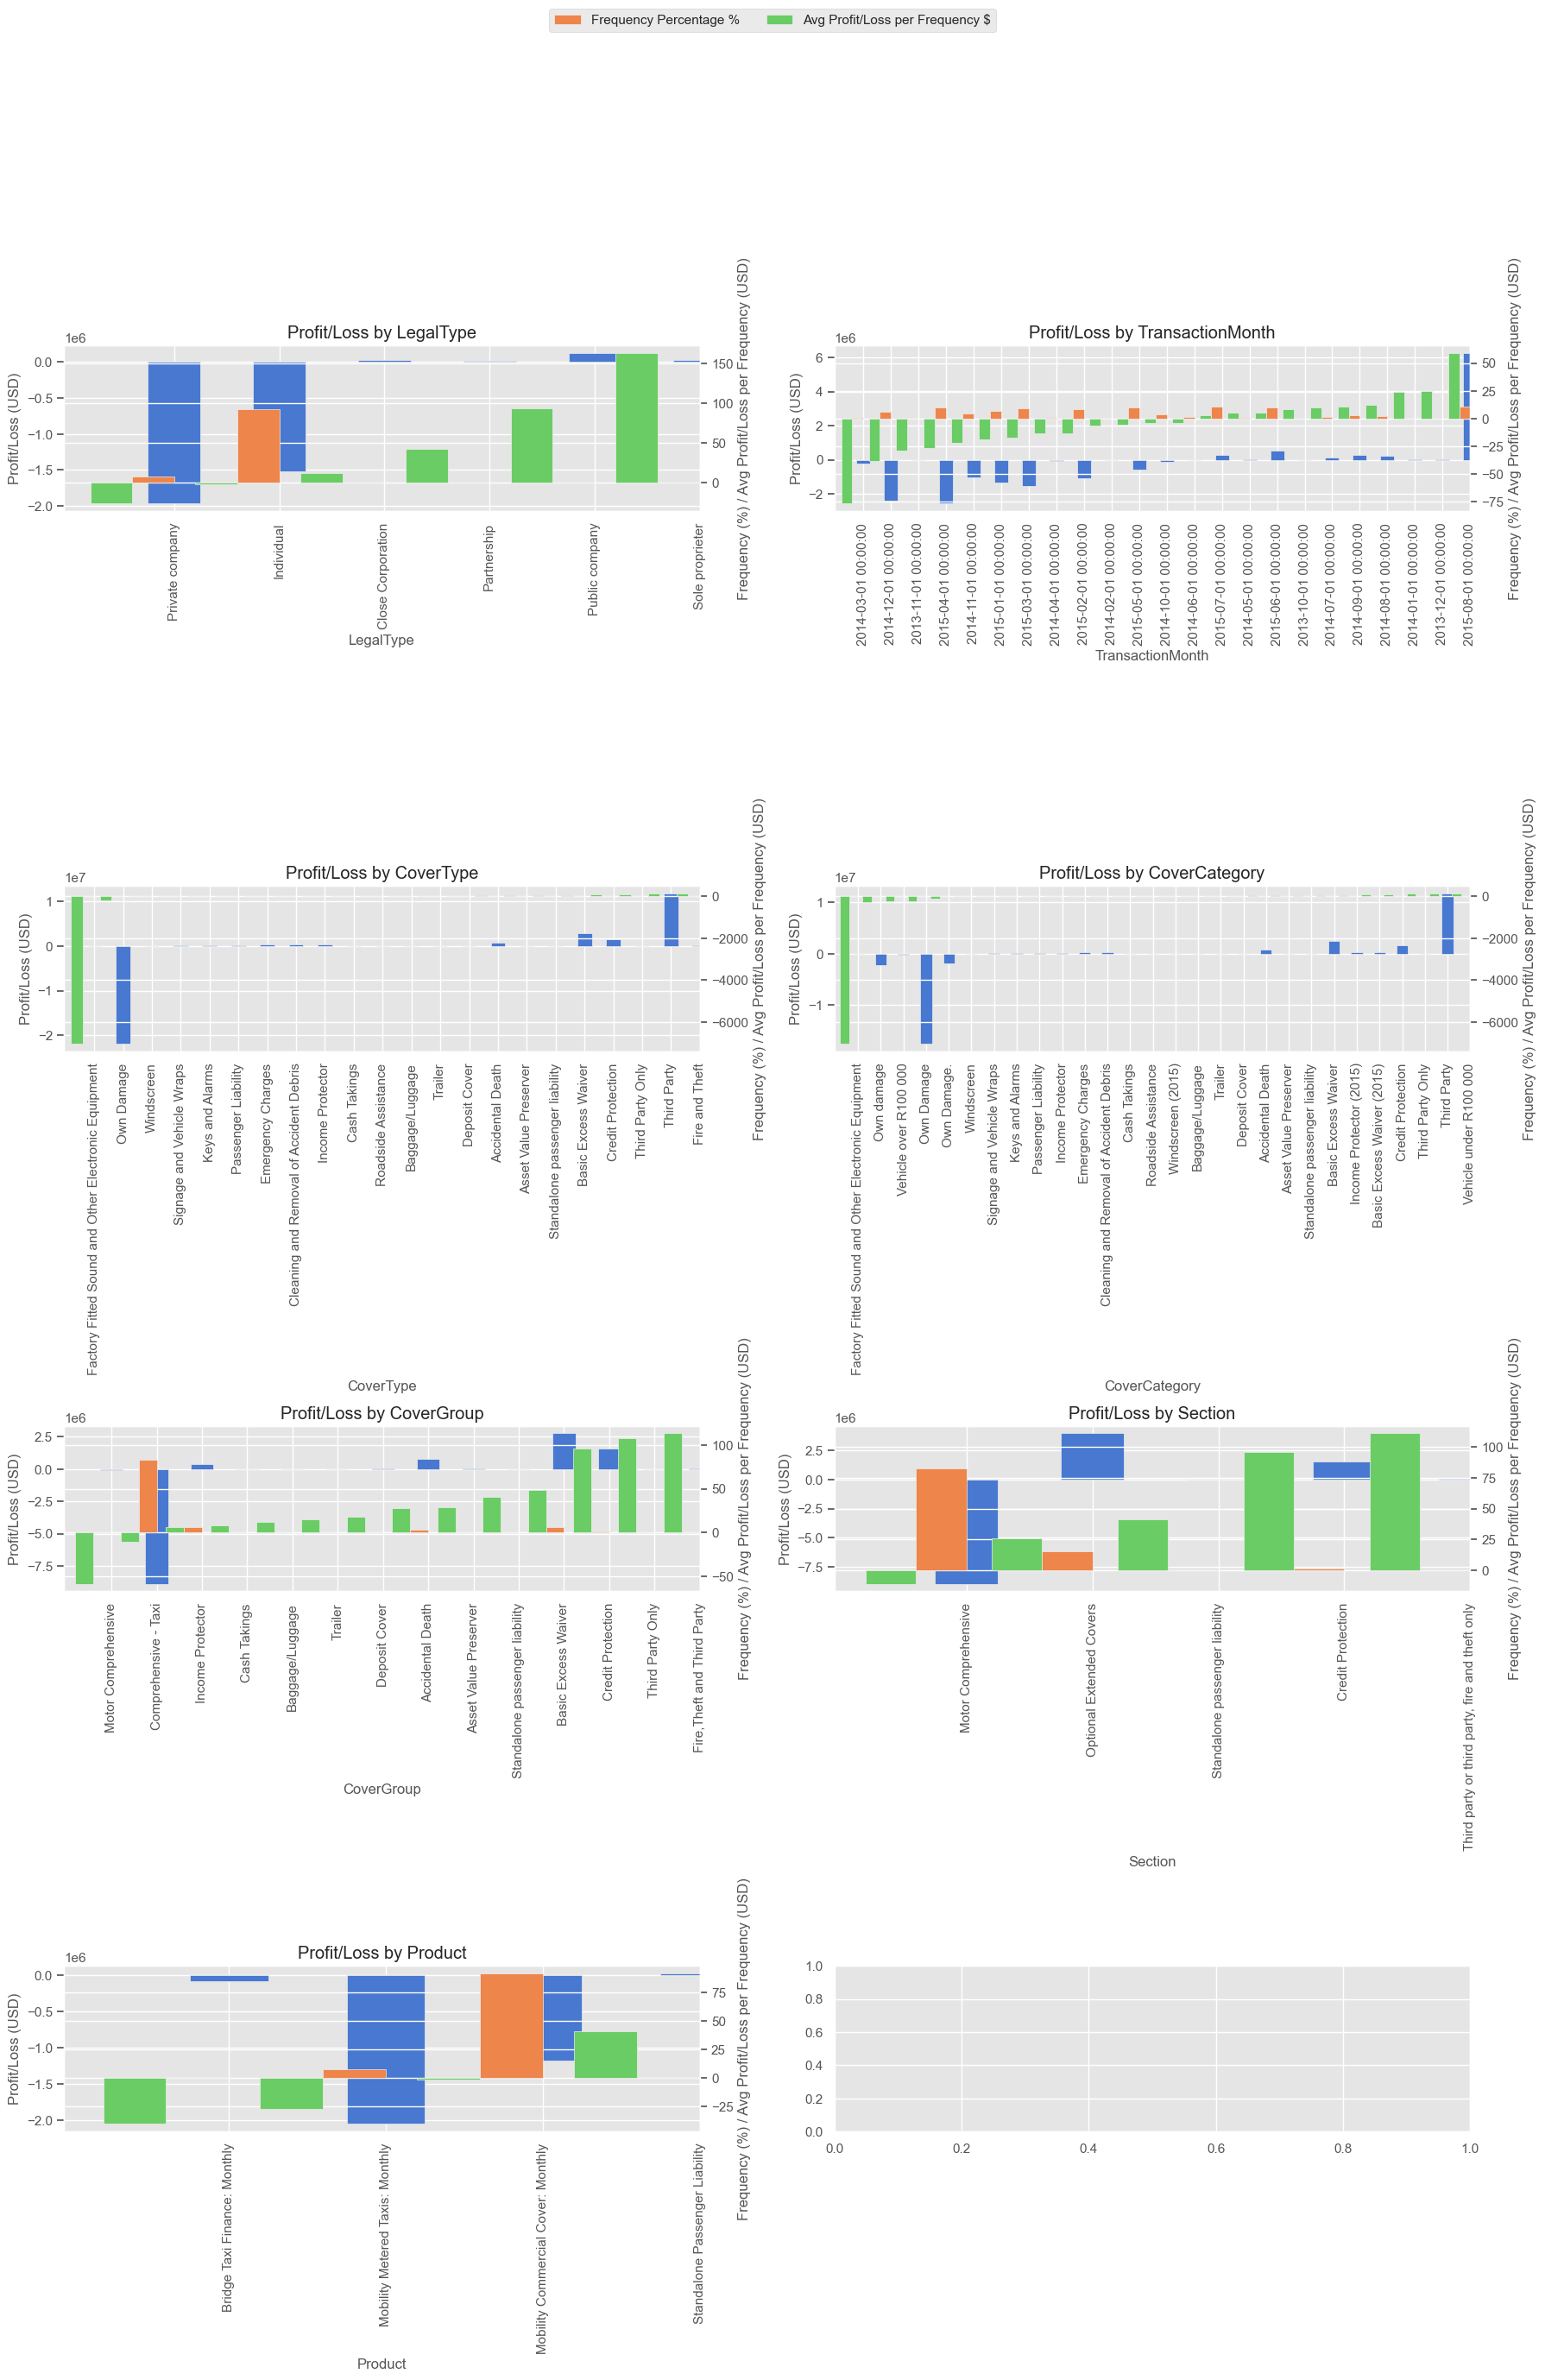

In [166]:
import seaborn as sns  # Import seaborn for color palettes

# Policy Analysis
policy_columns = ['LegalType', 'TransactionMonth', 'CoverType', 'CoverCategory', 'CoverGroup', 'Section', 'Product']
fig, axs = plt.subplots(4, 2, figsize=(18, 24))

for i, column in enumerate(policy_columns):
    result = calculate_losses(column)
    result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
    result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
    result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

    # Improved color palette using seaborn
    colors = sns.color_palette("muted")  # Choose a color palette

    ax = axs[i // 2, i % 2]
    result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
    ax2 = ax.twinx()
    result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
    result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

    # Improved axis labels
    ax.set_title(f'Profit/Loss by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Profit/Loss (USD)')
    ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

    # Rotate x-axis labels for readability (if necessary)
    if len(result[column].unique()) > 5:  # Check for long labels
        plt.xticks(rotation=45, ha='right')

    ax.grid(True)

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()


#### D. Financial Analysis
IsVATRegistered

In [98]:
calculate_losses('IsVATRegistered')

,IsVATRegistered,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,False,"60,277,763.02","63,576,205.60","-3,298,442.59",-5.47%,"984,244",99.49%,-3.35
1,True,"249,164.15","245,091.27","4,072.88",1.63%,"5,022",0.51%,0.81


Bank

In [99]:
calculate_losses('Bank')

,Bank,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
9,RMB Private Bank,"628,274.32","1,668,400.79","-1,040,126.48",-165.55%,"4,768",0.48%,-218.15
4,Investec Bank,"48,008.78","117,646.13","-69,637.36",-145.05%,732,0.07%,-95.13
1,Capitec Bank,"2,897,603.27","4,380,650.86","-1,483,047.60",-51.18%,"58,154",5.88%,-25.50
8,Old Mutual,"25,134.35","34,885.09","-9,750.73",-38.79%,688,0.07%,-14.17
7,Nedbank,"7,041,406.73","8,122,861.94","-1,081,455.20",-15.36%,"131,906",13.33%,-8.20
2,First National Bank,"16,498,254.75","18,591,663.21","-2,093,408.46",-12.69%,"260,806",26.36%,-8.03
10,Standard Bank,"10,873,650.24","12,023,977.08","-1,150,326.84",-10.58%,"181,465",18.34%,-6.34
0,ABSA Bank,"12,557,393.84","13,245,875.59","-688,481.75",-5.48%,"204,013",20.62%,-3.37
11,Unknown,"9,747,741.96","5,598,220.63","4,149,521.33",42.57%,"144,231",14.58%,28.77
3,FirstRand Bank,"63,427.15","32,314.91","31,112.23",49.05%,638,0.06%,48.77


AccountType

In [100]:
calculate_losses('AccountType')

,AccountType,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
2,Transmission account,"217,245.81","320,318.30","-103,072.49",-47.45%,"3,721",0.38%,-27.70
0,Current account,"35,293,287.60","40,082,743.45","-4,789,455.85",-13.57%,"587,698",59.41%,-8.15
1,Savings account,"21,112,816.25","20,826,078.64","286,737.61",1.36%,"357,617",36.15%,0.80
3,Unknown,"3,903,577.51","2,592,156.49","1,311,421.03",33.60%,"40,230",4.07%,32.60


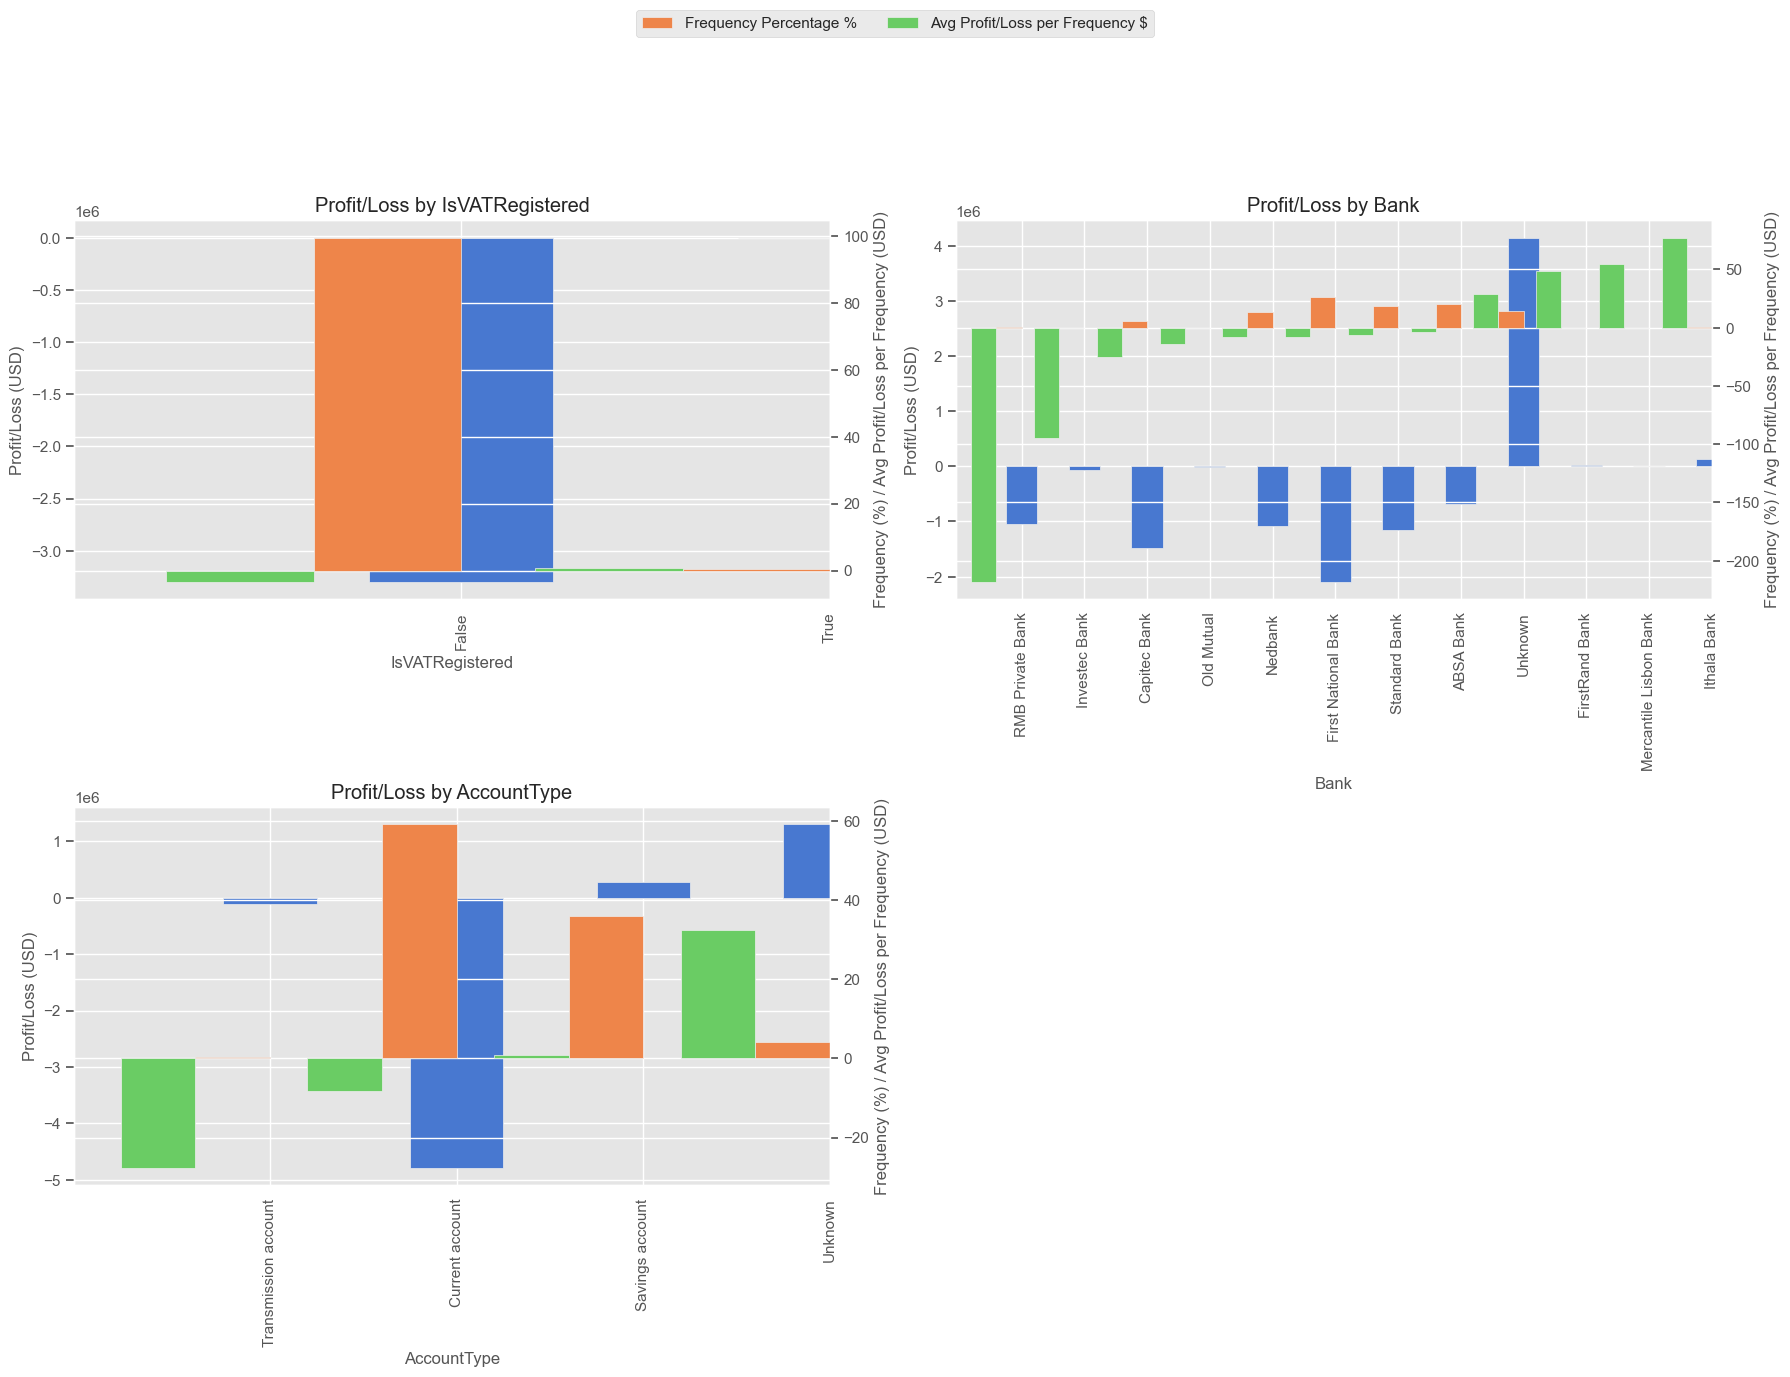

In [168]:
import seaborn as sns  # Import seaborn for color palettes

# Financial Analysis
financial_columns = ['IsVATRegistered', 'Bank', 'AccountType']
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for i, column in enumerate(financial_columns):
    result = calculate_losses(column)
    result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
    result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
    result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

    # Improved color palette using seaborn
    colors = sns.color_palette("muted")  # Choose a color palette

    ax = axs[i // 2, i % 2]
    result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
    ax2 = ax.twinx()
    result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
    result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

    # Improved axis labels
    ax.set_title(f'Profit/Loss by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Profit/Loss (USD)')
    ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

    # Rotate x-axis labels for readability (if necessary)
    if len(result[column].unique()) > 5:  # Check for long labels
        plt.xticks(rotation=45, ha='right')

    ax.grid(True)

# Remove the empty subplot and adjust the size of the third subplot
fig.delaxes(axs[1, 1])
axs[1, 0].set_position([0.125, 0.1, 0.775, 0.6])

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()


#### E. Vehicle Analysis
VehicleType

In [101]:
calculate_losses('VehicleType')

,VehicleType,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
1,Heavy Commercial,"460,947.86","750,474.58","-289,526.72",-62.81%,"7,401",0.75%,-39.12
3,Medium Commercial,"3,922,839.85","4,119,866.90","-197,027.05",-5.02%,"53,983",5.46%,-3.65
4,Passenger Vehicle,"55,824,397.19","58,882,506.36","-3,058,109.16",-5.48%,"923,320",93.33%,-3.31
2,Light Commercial,"260,497.52","60,452.50","200,045.02",76.79%,"3,897",0.39%,51.33
0,Bus,"58,244.74","7,996.54","50,248.20",86.27%,665,0.07%,75.56


RegistrationYear

In [102]:
calculate_losses('RegistrationYear')

,RegistrationYear,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
20,2011,"5,496,823.22","6,785,480.45","-1,288,657.24",-23.44%,"88,645",8.96%,-14.54
10,2001,"172,863.60","252,876.49","-80,012.89",-46.29%,"5,858",0.59%,-13.66
17,2008,"5,913,181.58","7,216,730.32","-1,303,548.74",-22.04%,"106,005",10.72%,-12.30
16,2007,"3,861,956.30","4,717,123.66","-855,167.36",-22.14%,"82,272",8.32%,-10.39
19,2010,"5,902,309.27","6,366,718.93","-464,409.66",-7.87%,"95,575",9.66%,-4.86
21,2012,"8,239,255.26","8,674,413.85","-435,158.59",-5.28%,"130,412",13.18%,-3.34
23,2014,"11,584,977.68","12,010,382.17","-425,404.49",-3.67%,"150,728",15.24%,-2.82
13,2004,"624,335.46","617,998.94","6,336.52",1.01%,"16,956",1.71%,0.37
14,2005,"1,276,995.31","1,245,356.06","31,639.25",2.48%,"30,751",3.11%,1.03
22,2013,"7,981,105.77","7,832,291.29","148,814.47",1.86%,"113,076",11.43%,1.32


make

In [103]:
calculate_losses('make')

,make,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
37,SUZUKI,"27,012.57","171,210.89","-144,198.33",-533.82%,408,0.04%,-353.43
20,JMC,"5,635.79","23,002.18","-17,366.39",-308.14%,120,0.01%,-144.72
17,HYUNDAI,"102,721.71","451,580.75","-348,859.03",-339.62%,"2,446",0.25%,-142.62
24,MARCOPOLO,"2,665.65","7,996.54","-5,330.88",-199.98%,51,0.01%,-104.53
32,POLARSUN,"41,029.40","125,197.84","-84,168.44",-205.14%,934,0.09%,-90.12
0,AUDI,"376,274.32","1,021,003.71","-644,729.39",-171.35%,"7,407",0.75%,-87.04
1,B.A.W,"166,044.01","287,137.47","-121,093.46",-72.93%,"2,160",0.22%,-56.06
2,BMW,"242,765.24","481,497.15","-238,731.91",-98.34%,"5,317",0.54%,-44.90
18,IVECO,"526,126.24","755,892.95","-229,766.71",-43.67%,"8,430",0.85%,-27.26
40,VOLKSWAGEN,"1,408,950.45","1,839,179.63","-430,229.19",-30.54%,"20,780",2.10%,-20.70


bodytype

In [104]:
calculate_losses('bodytype')

,bodytype,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
2,C/P,"53,591.30","291,435.94","-237,844.64",-443.81%,644,0.07%,-369.32
11,S/W,"155,343.01","644,336.33","-488,993.32",-314.78%,"3,100",0.31%,-157.74
5,D/S,"5,635.79","23,002.18","-17,366.39",-308.14%,120,0.01%,-144.72
12,SUV,"142,448.33","416,550.14","-274,101.81",-192.42%,"2,049",0.21%,-133.77
6,H/B,"244,760.70","525,252.53","-280,491.83",-114.60%,"8,254",0.83%,-33.98
10,S/D,"1,510,414.30","2,412,115.59","-901,701.29",-59.70%,"41,699",4.22%,-21.62
8,P/V,"4,035,577.50","4,820,702.20","-785,124.69",-19.46%,"55,032",5.56%,-14.27
7,MPV,"1,420,662.38","1,758,183.05","-337,520.68",-23.76%,"31,968",3.23%,-10.56
0,B/S,"52,357,231.76","52,842,629.32","-485,397.55",-0.93%,"836,311",84.54%,-0.58
4,D/C,"2,926.98",0.00,"2,926.98",100.00%,132,0.01%,22.17


AlarmImmobiliser

In [105]:
calculate_losses('AlarmImmobiliser')

,AlarmImmobiliser,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
1,Yes,"60,511,132.40","63,821,296.88","-3,310,164.47",-5.47%,"989,029",99.98%,-3.35
0,No,"15,794.76",0.00,"15,794.76",100.00%,237,0.02%,66.64


NewVehicle

In [106]:
calculate_losses('NewVehicle')

,NewVehicle,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
1,More than 6 months,"60,378,252.18","63,821,296.88","-3,443,044.69",-5.70%,"987,686",99.84%,-3.49
0,Less than 6 months,"148,674.98",0.00,"148,674.98",100.00%,"1,580",0.16%,94.10


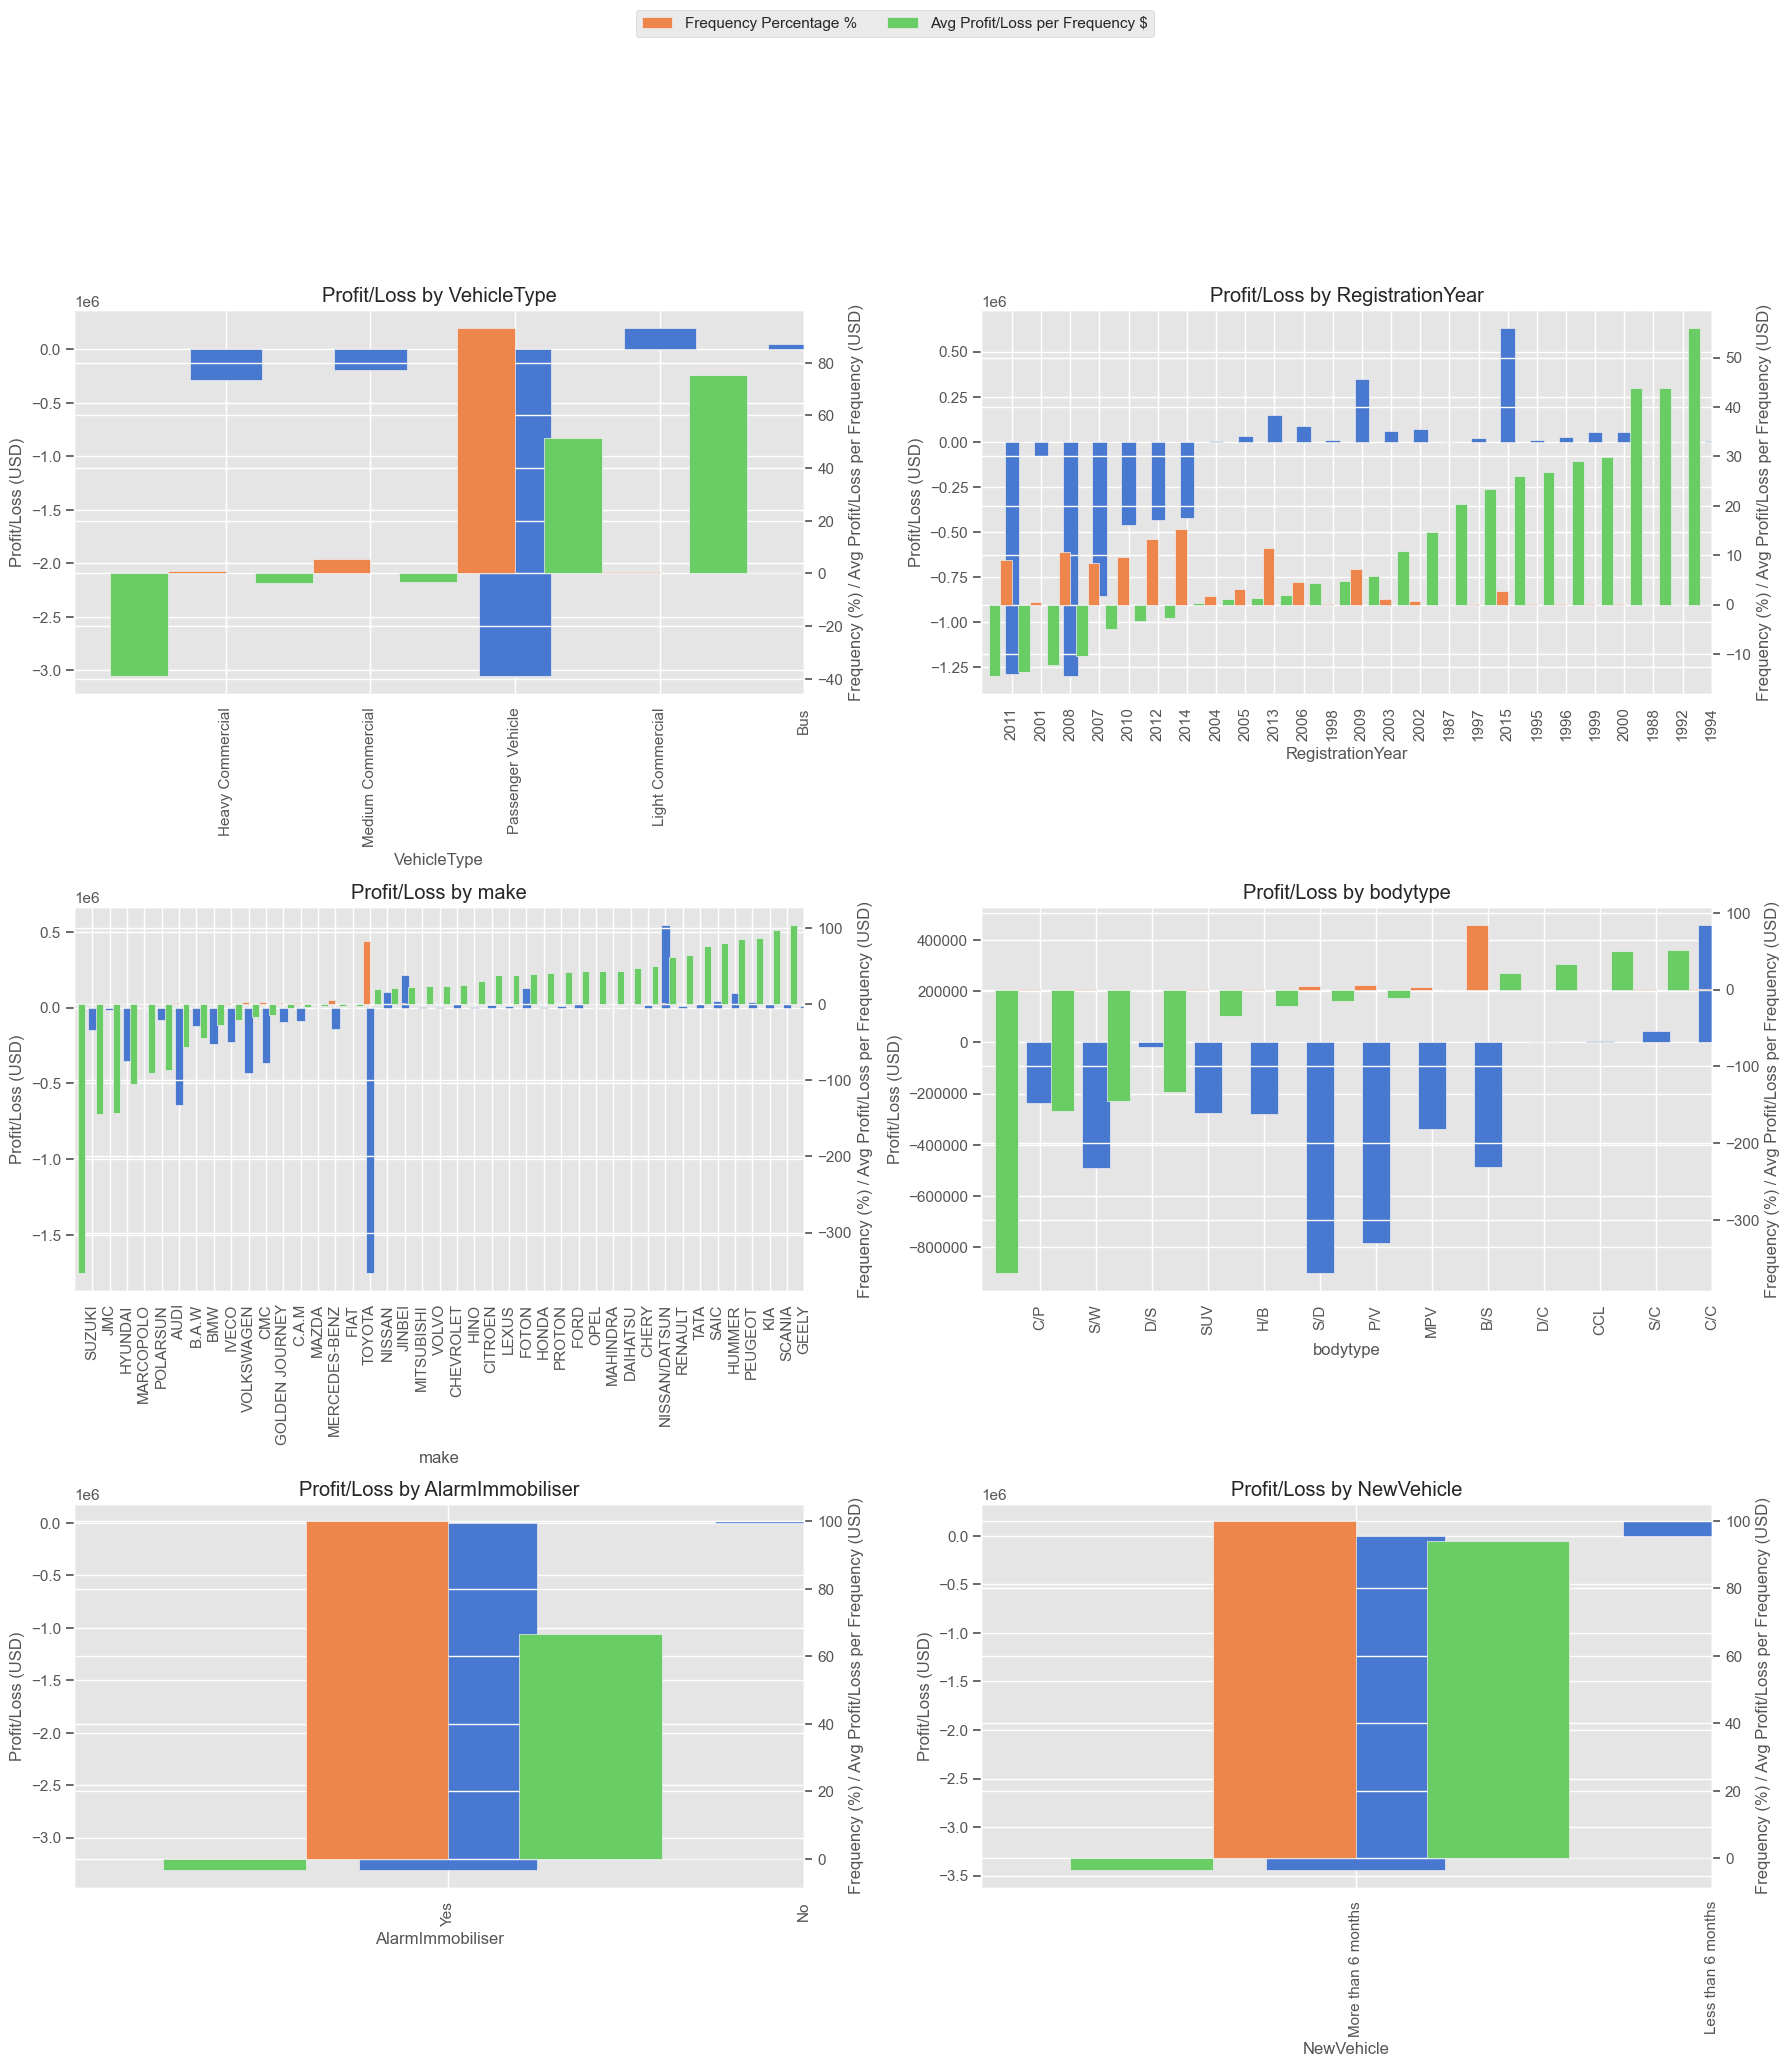

In [169]:
import seaborn as sns  # Import seaborn for color palettes

# Vehicle Analysis
vehicle_columns = ['VehicleType', 'RegistrationYear', 'make', 'bodytype', 'AlarmImmobiliser', 'NewVehicle']
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

for i, column in enumerate(vehicle_columns):
    result = calculate_losses(column)
    result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
    result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
    result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

    # Improved color palette using seaborn
    colors = sns.color_palette("muted")  # Choose a color palette

    ax = axs[i // 2, i % 2]
    result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
    ax2 = ax.twinx()
    result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
    result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

    # Improved axis labels
    ax.set_title(f'Profit/Loss by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Profit/Loss (USD)')
    ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

    # Rotate x-axis labels for readability (if necessary)
    if len(result[column].unique()) > 5:  # Check for long labels
        plt.xticks(rotation=45, ha='right')

    ax.grid(True)

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()

#### F. Policy Terms Analysis
TermFrequency

In [107]:
calculate_losses('TermFrequency')

,TermFrequency,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
1,Monthly,"60,504,809.66","63,821,296.88","-3,316,487.21",-5.48%,"988,728",99.95%,-3.35
0,Annual,"22,117.50",0.00,"22,117.50",100.00%,538,0.05%,41.11


ExcessSelected

In [108]:
calculate_losses('ExcessSelected')

,ExcessSelected,TotalPremium $,TotalClaims $,Difference $,Profit/Loss %,Frequency,Frequency Percentage %,Avg Profit/Loss per Frequency $
0,Mobility - Factory Sound,0.00,"21,094.74","-21,094.74",-inf%,3,0.00%,"-7,031.58"
8,Mobility - Taxi with value more than R100 000 ...,"37,933.42","213,153.60","-175,220.17",-461.92%,52,0.01%,"-3,369.62"
5,Mobility - Taxi with value more than R100 000 ...,"471,969.60","1,208,932.56","-736,962.96",-156.15%,"1,033",0.10%,-713.42
1,Mobility - Metered Taxis - R2000,"1,689,548.79","3,894,449.63","-2,204,900.84",-130.50%,"6,741",0.68%,-327.09
6,Mobility - Taxi with value more than R100 000 ...,"28,339,007.86","45,145,319.87","-16,806,312.01",-59.30%,"74,909",7.57%,-224.36
4,Mobility - Taxi with value less than R100 000 ...,"3,384,480.08","5,246,388.35","-1,861,908.27",-55.01%,"15,215",1.54%,-122.37
2,Mobility - Metered Taxis - R5000,"700,267.35","770,739.63","-70,472.27",-10.06%,"1,695",0.17%,-41.58
10,Mobility - Windscreen,"1,170,737.48","1,232,342.91","-61,605.43",-5.26%,"95,711",9.67%,-0.64
7,Mobility - Taxi with value more than R100 000 ...,"1,681,145.72","1,671,586.87","9,558.85",0.57%,"3,022",0.31%,3.16
11,Mobility - Windscreen (Feb2015),"103,717.18","47,834.15","55,883.03",53.88%,"6,409",0.65%,8.72


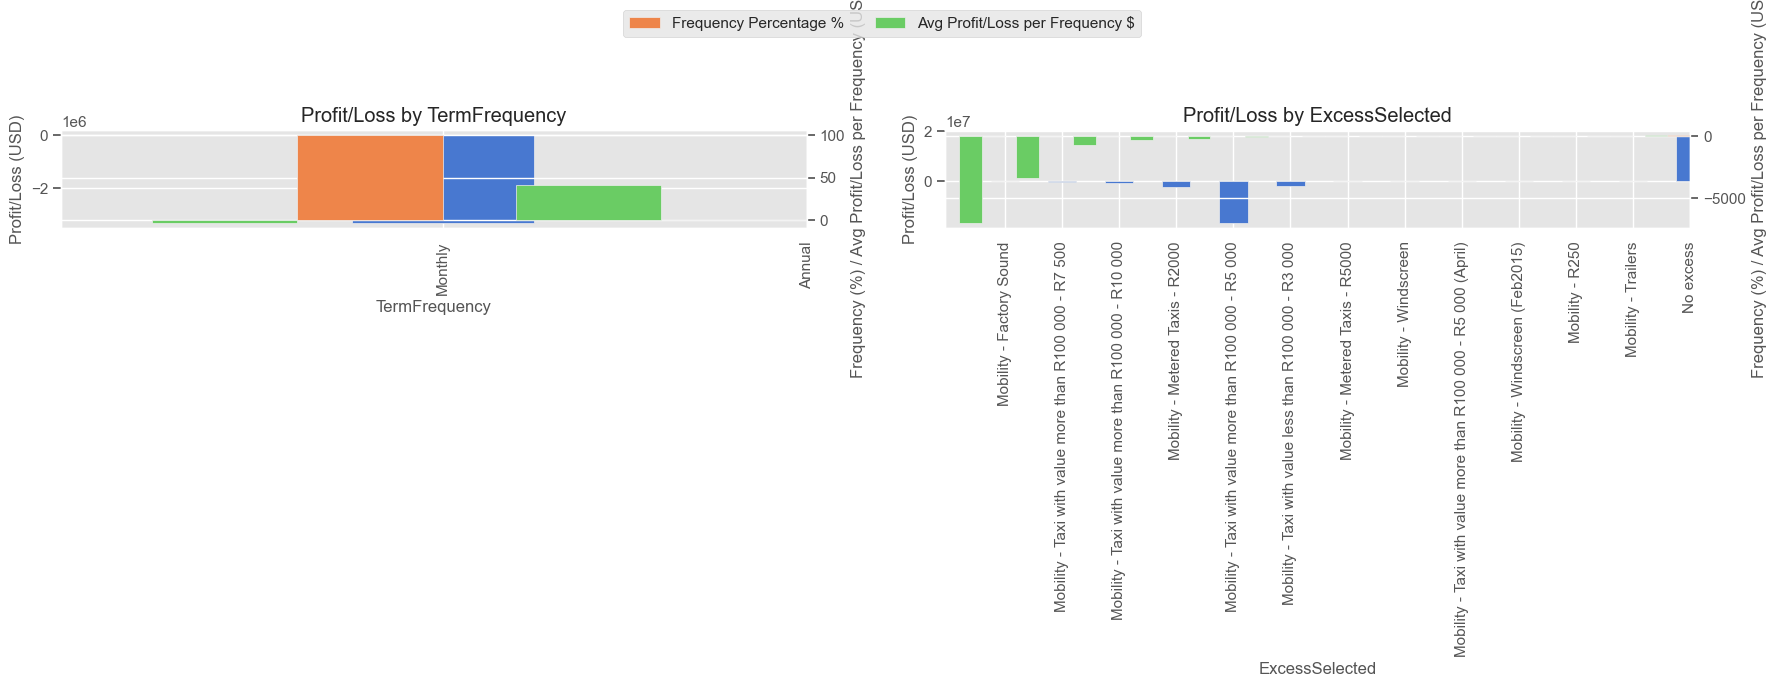

In [172]:
import seaborn as sns  # Import seaborn for color palettes

# Policy Terms Analysis
policy_terms_columns = ['TermFrequency', 'ExcessSelected']
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, column in enumerate(policy_terms_columns):
    result = calculate_losses(column)
    result['Difference $'] = result['Difference $'].str.replace(',', '').astype(float)
    result['Frequency Percentage %'] = result['Frequency Percentage %'].str.replace('%', '').astype(float)
    result['Avg Profit/Loss per Frequency $'] = result['Avg Profit/Loss per Frequency $'].str.replace(',', '').astype(float)

    # Improved color palette using seaborn
    colors = sns.color_palette("muted")  # Choose a color palette

    ax = axs[i]
    result.plot(kind='bar', x=column, y='Difference $', color=colors[0], legend=False, ax=ax)  # Use first color for profit/loss
    ax2 = ax.twinx()
    result.plot(kind='bar', x=column, y='Frequency Percentage %', color=colors[1], legend=False, ax=ax2, position=1, width=0.4)  # Use second color for frequency
    result.plot(kind='bar', x=column, y='Avg Profit/Loss per Frequency $', color=colors[2], legend=False, ax=ax2, position=2, width=0.4)  # Use third color for avg profit/loss

    # Improved axis labels
    ax.set_title(f'Profit/Loss by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Profit/Loss (USD)')
    ax2.set_ylabel('Frequency (%) / Avg Profit/Loss per Frequency (USD)')

    # Rotate x-axis labels for readability (if necessary)
    if len(result[column].unique()) > 5:  # Check for long labels
        plt.xticks(rotation=45, ha='right')

    ax.grid(True)

# Adjust spacing between subplots for aesthetics
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)  # Add legend outside the plot

plt.tight_layout()
plt.show()